# EDA Example

## Packages - install if needed

In [1]:
#! pip install swifter
#! pip install wordcloud
#! pip install spacy
#! pip install missingno
#! pip install datasketch
#! pip install editdistance
#! pip install ppscore
#! pip install pandas -U
#! pip install matplotlib -U

## Imports

In [2]:
import seaborn as sn
import pandas as pd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [3]:
import eda_utils as eda

In [4]:
import importlib
importlib.reload(eda);

In [5]:
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

# Load Data - from seaborn

In [6]:
#data = sn.load_dataset('mpg')
#print(data.shape)
#data.head(5)

# Load Data - from file

In [33]:
filename = "AB_NYC_2019.zip"
data = pd.read_csv(filename, compression="zip")
print(data.shape)
data.head(5)

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Try to infer Dates automatically

In [8]:
data = eda.infer_date_col(data)

col: last_review was transformed to date


# EDA
- Missing data visualization
- Basic EDA
- EDA Correlations/Subgroup-populations - all to Column
- EDA on text columns

## Missing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null datetime64[ns]
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-nu

None


Percentage of missing data:
col:id, missing values: 0.0%
col:name, missing values: 0.00032723182329481544%
col:host_id, missing values: 0.0%
col:host_name, missing values: 0.00042949176807444524%
col:neighbourhood_group, missing values: 0.0%
col:neighbourhood, missing values: 0.0%
col:latitude, missing values: 0.0%
col:longitude, missing values: 0.0%
col:room_type, missing values: 0.0%
col:price, missing values: 0.0%
col:minimum_nights, missing values: 0.0%
col:number_of_reviews, missing values: 0.0%
col:last_review, missing values: 0.20558339298496778%
col:reviews_per_month, missing values: 0.20558339298496778%
col:calculated_host_listings_count, missing values: 0.0%
col:availability_365, missing values: 0.0%


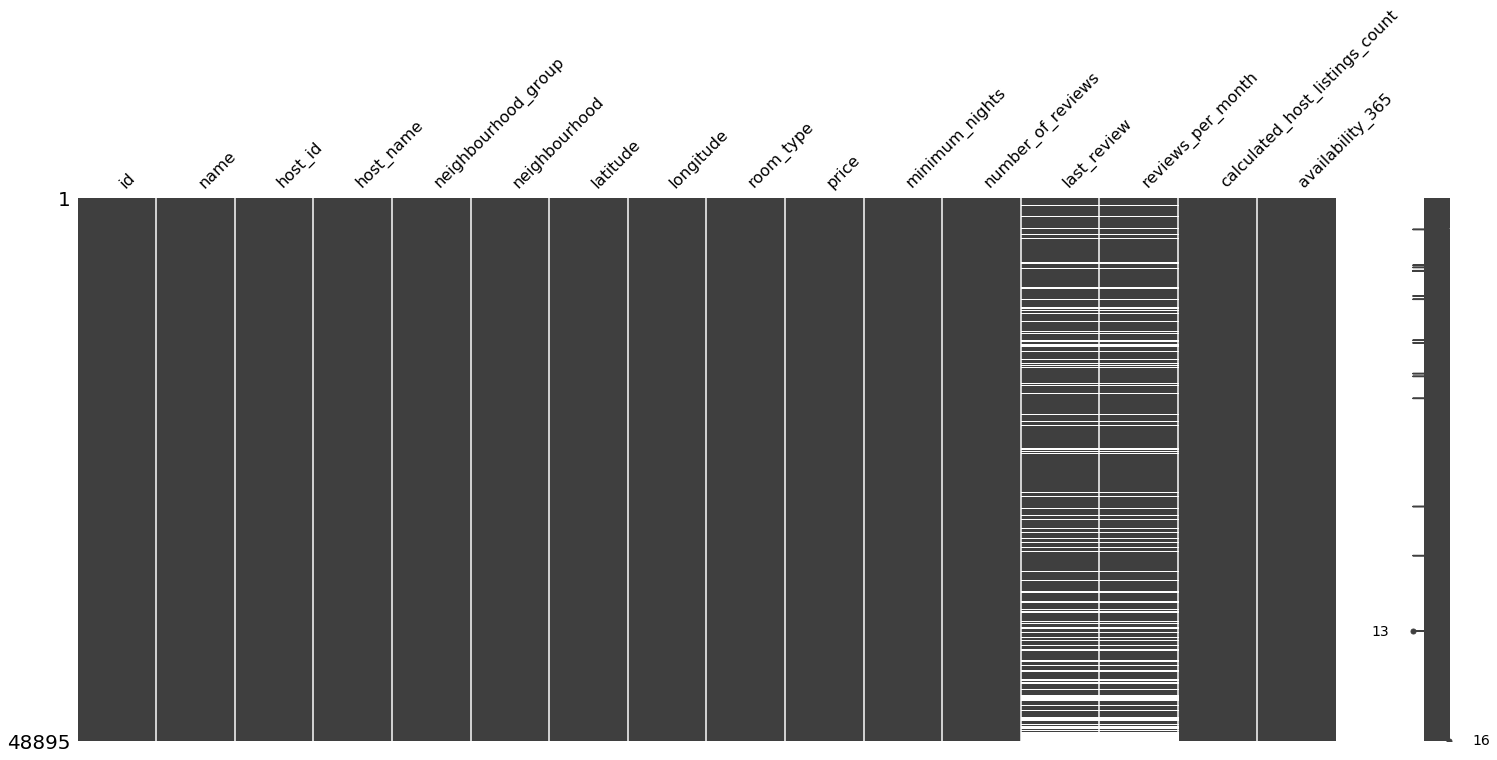

In [9]:
eda.missing_data(data)

## Plot a chosen population against columns that have missing values above some threshold

1 indicates missing values, 0 are non-missing
medians:  last_review_missing_values
0    101
1    120
Name: price, dtype: int64


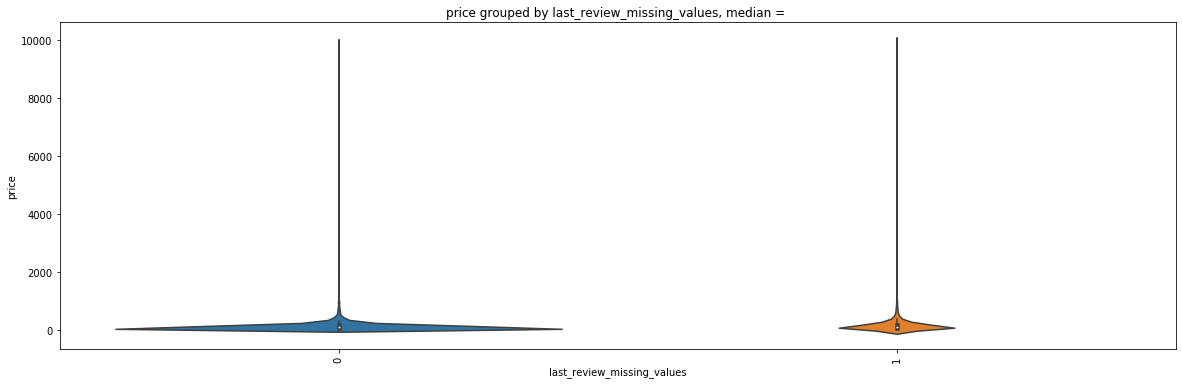

medians:  reviews_per_month_missing_values
0    101
1    120
Name: price, dtype: int64


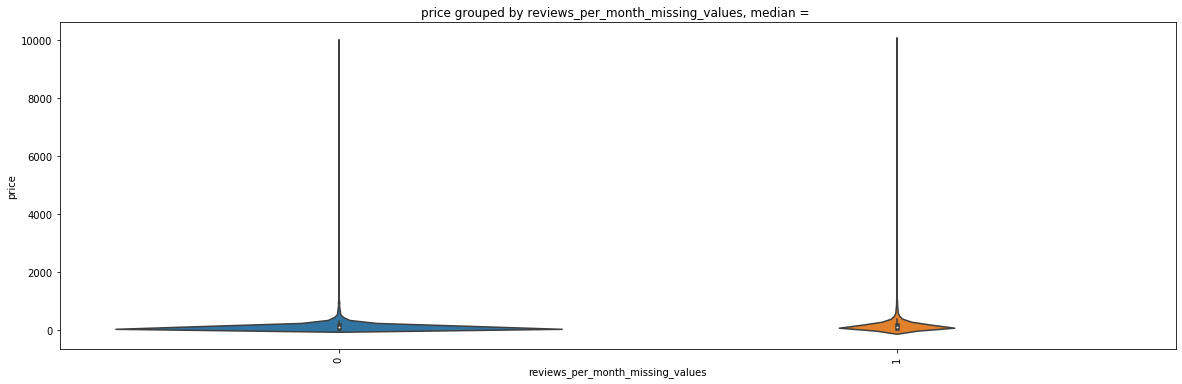

In [10]:
compared_col = "price"
eda.col_against_missing_data(data, compared_col)

## Basic EDA


column: id , dtype: int64
count: 48895
nunique: 48895
isnull sum: 0
zero count: 0
max: 36487245 min: 2539
top value counts:
       id  count
 11667455      1
  7851219      1
 33138268      1


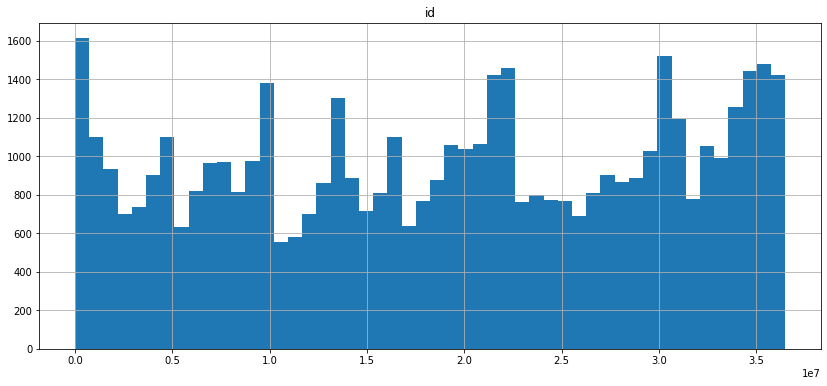


column: name , dtype: object
count: 48879
nunique: 47905
isnull sum: 16
zero count: 0
top value counts:
                         name  count
               Hillside Hotel     18
          Home away from home     17
 New york Multi-unit building     16
nunique: 47905
Too many (or just one) unique values for bar-plot

column: host_id , dtype: int64
count: 48895
nunique: 37457
isnull sum: 0
zero count: 0
max: 274321313 min: 2438
top value counts:
   host_id  count
 219517861    327
 107434423    232
  30283594    121


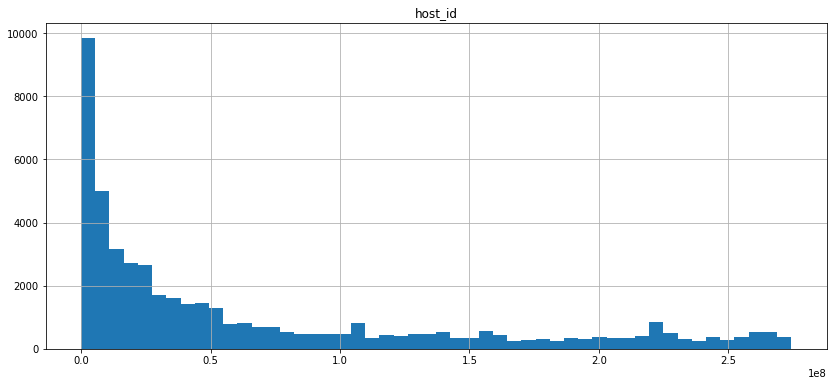


column: host_name , dtype: object
count: 48874
nunique: 11452
isnull sum: 21
zero count: 0
top value counts:
    host_name  count
      Michael    417
        David    403
 Sonder (NYC)    327
nunique: 11452
Too many (or just one) unique values for bar-plot

column: neighbourhood_group , dtype: object
count: 48895
nunique: 5
isnull sum: 0
zero count: 0
top value counts:
neighbourhood_group  count
          Manhattan  21661
           Brooklyn  20104
             Queens   5666
nunique: 5


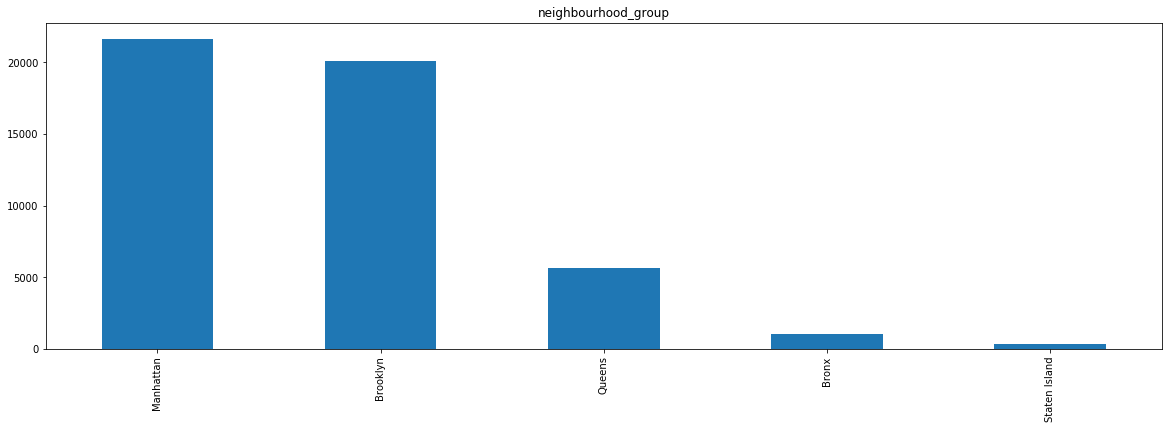

*** Rare categories:


Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64


column: neighbourhood , dtype: object
count: 48895
nunique: 221
isnull sum: 0
zero count: 0
top value counts:
      neighbourhood  count
       Williamsburg   3920
 Bedford-Stuyvesant   3714
             Harlem   2658
nunique: 221
Too many (or just one) unique values for bar-plot

column: latitude , dtype: float64
count: 48895
nunique: 19048
isnull sum: 0
zero count: 0
max: 40.913059999999994 min: 40.499790000000004
top value counts:
 latitude  count
 40.71813     18
 40.68634     13
 40.69414     13


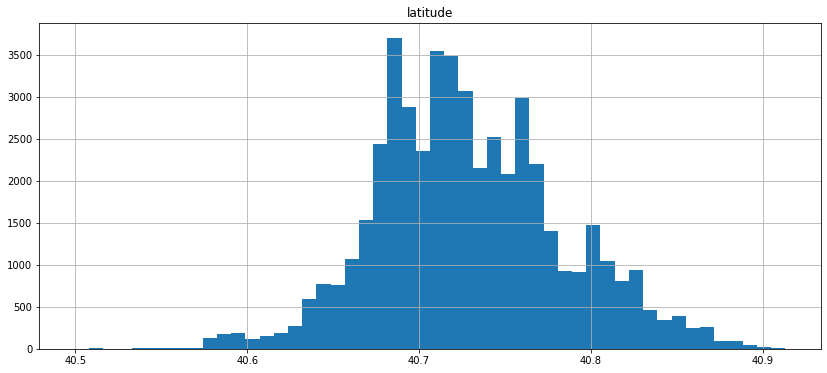


column: longitude , dtype: float64
count: 48895
nunique: 14718
isnull sum: 0
zero count: 0
max: -73.71299 min: -74.24441999999999
top value counts:
 longitude  count
 -73.95677     18
 -73.95427     18
 -73.95405     17


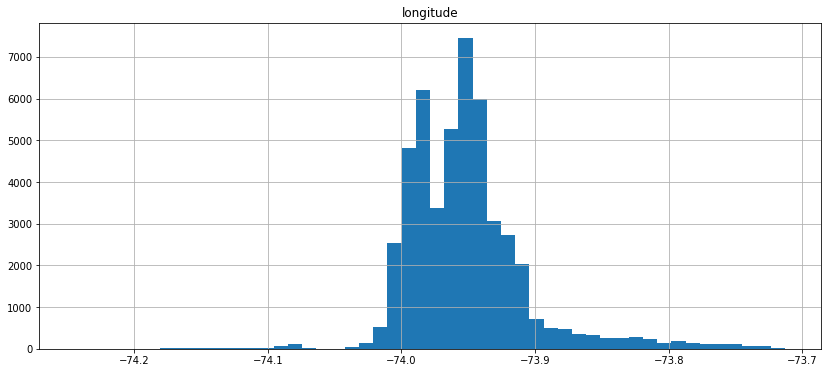


column: room_type , dtype: object
count: 48895
nunique: 3
isnull sum: 0
zero count: 0
top value counts:
       room_type  count
 Entire home/apt  25409
    Private room  22326
     Shared room   1160
nunique: 3


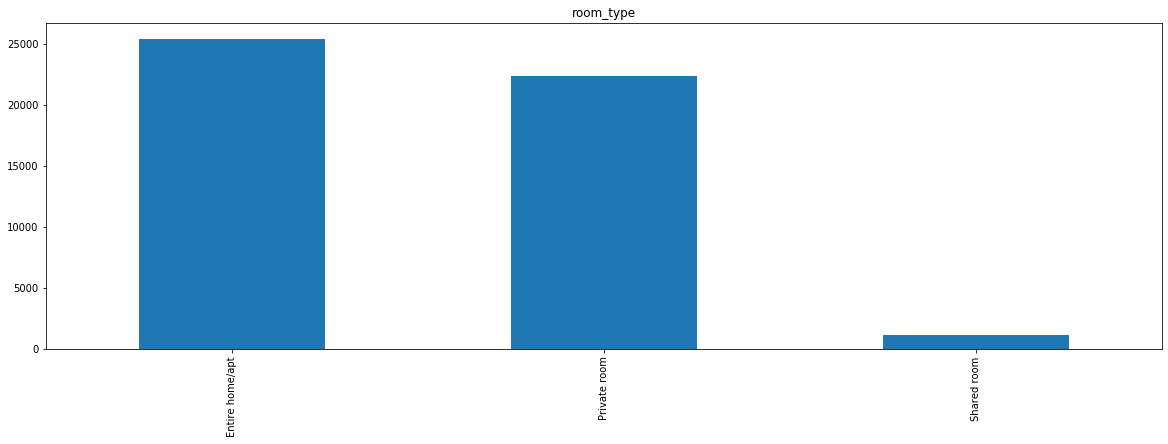

*** Rare categories:


Shared room    0.023724
Name: room_type, dtype: float64


column: price , dtype: int64
count: 48895
nunique: 674
isnull sum: 0
zero count: 11
max: 10000 min: 0
top value counts:
 price  count
   100   2051
   150   2047
    50   1534


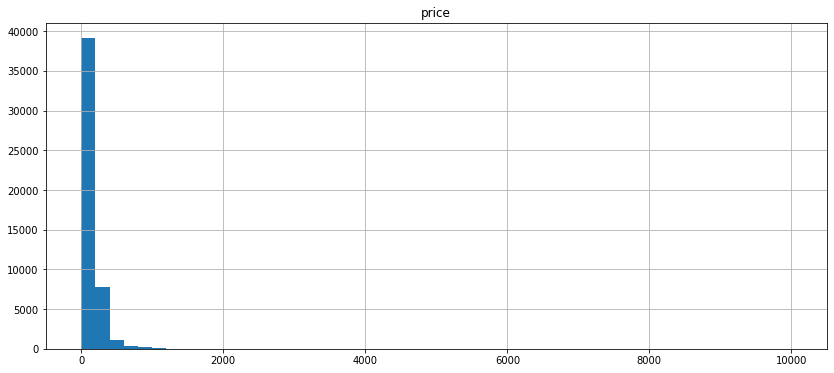


column: minimum_nights , dtype: int64
count: 48895
nunique: 109
isnull sum: 0
zero count: 0
max: 1250 min: 1
top value counts:
 minimum_nights  count
              1  12720
              2  11696
              3   7999


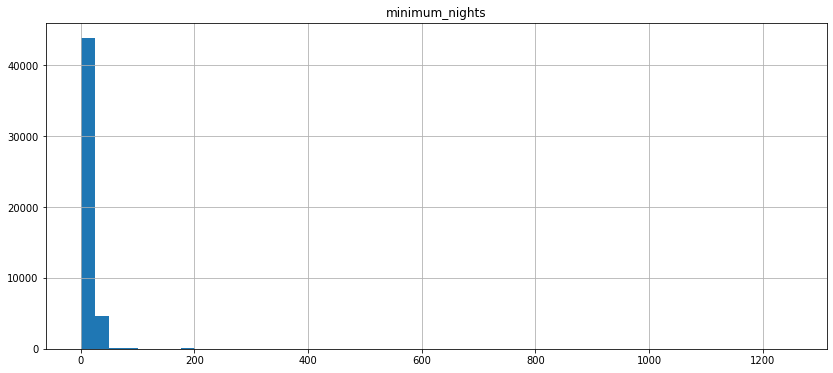


column: number_of_reviews , dtype: int64
count: 48895
nunique: 394
isnull sum: 0
zero count: 10052
max: 629 min: 0
top value counts:
 number_of_reviews  count
                 0  10052
                 1   5244
                 2   3465


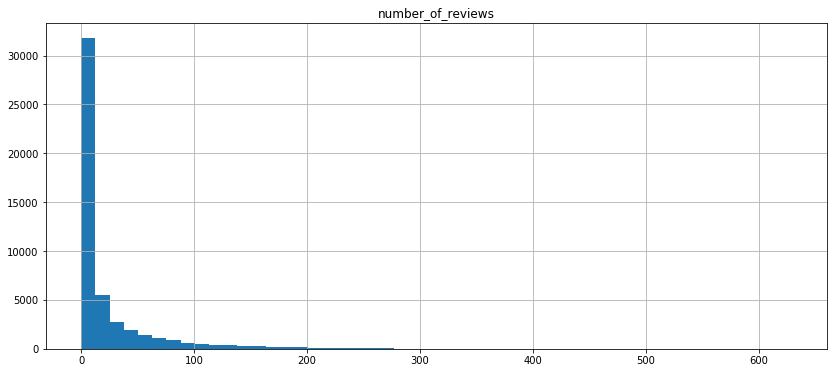


column: last_review , dtype: datetime64[ns]
count: 38843
nunique: 1764
isnull sum: 10052
zero count: 0
max: 2019-07-08 00:00:00 min: 2011-03-28 00:00:00
top value counts:
last_review  count
 2019-06-23   1413
 2019-07-01   1359
 2019-06-30   1341


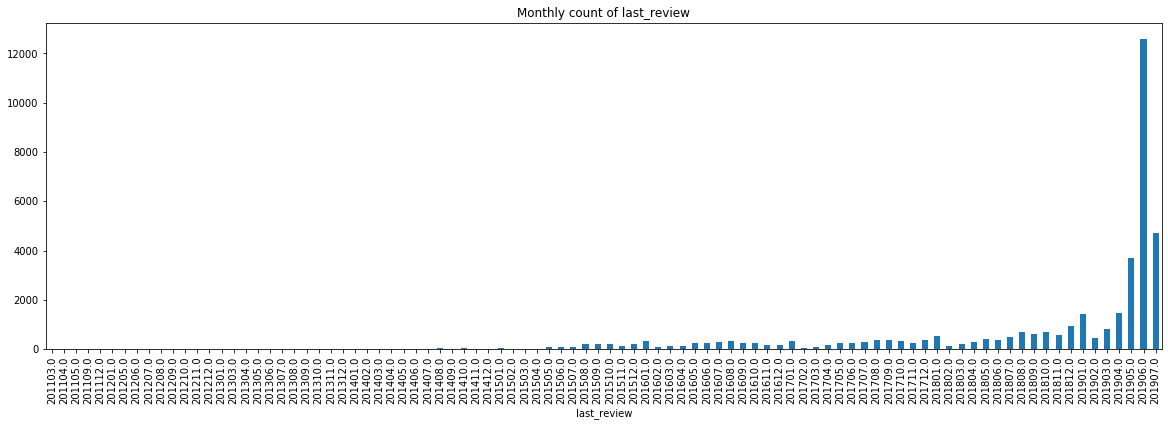


column: reviews_per_month , dtype: float64
count: 38843
nunique: 937
isnull sum: 10052
zero count: 0
max: 58.5 min: 0.01
top value counts:
 reviews_per_month  count
              0.02    919
              0.05    893
              1.00    893


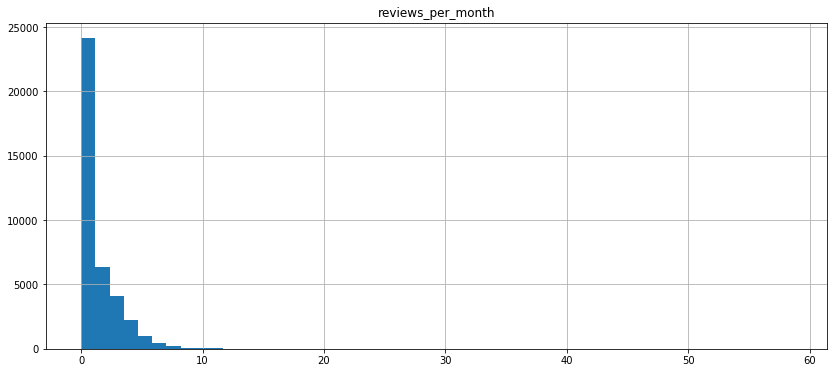


column: calculated_host_listings_count , dtype: int64
count: 48895
nunique: 47
isnull sum: 0
zero count: 0
max: 327 min: 1
top value counts:
 calculated_host_listings_count  count
                              1  32303
                              2   6658
                              3   2853


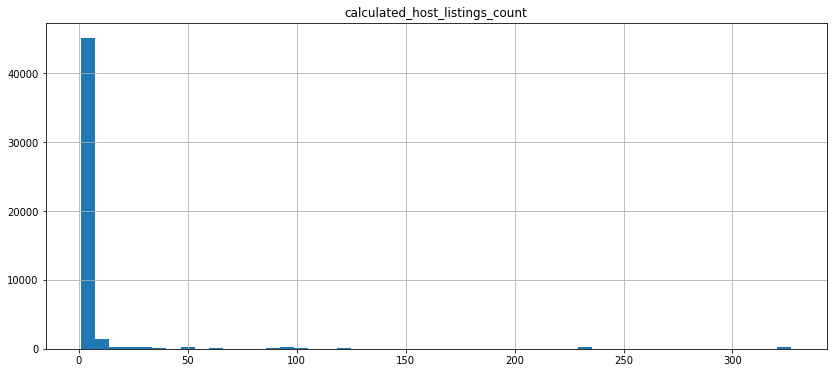


column: availability_365 , dtype: int64
count: 48895
nunique: 366
isnull sum: 0
zero count: 17533
max: 365 min: 0
top value counts:
 availability_365  count
                0  17533
              365   1295
              364    491


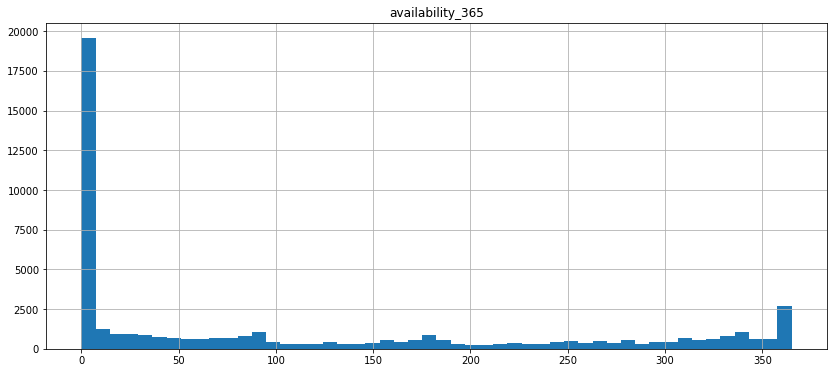

In [11]:
eda.eda_basic(data)

# Correlations Predictive Power Scores and Scatter Matrices

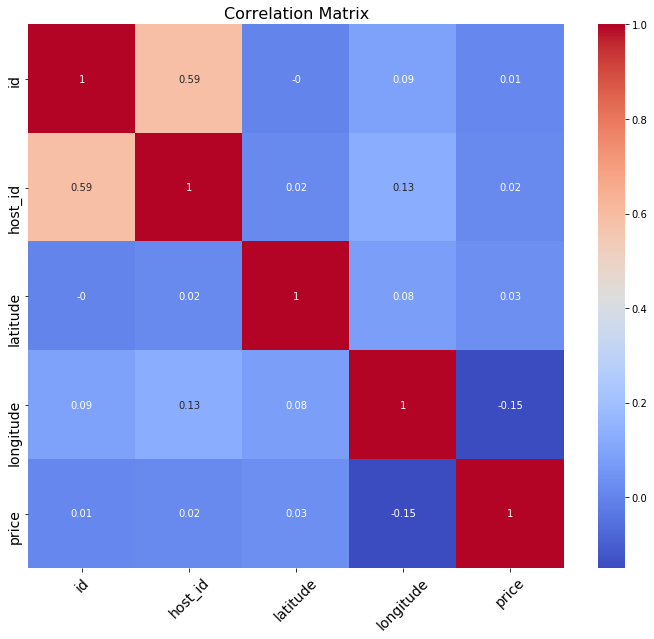

In [12]:
# Correlation matrix
col_numerical = list(data.select_dtypes([np.number]).columns)
corrMatrix = data[col_numerical[:5]].corr().round(2)
eda.plot_corrmatrix(corrMatrix, 'Correlation Matrix')

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.

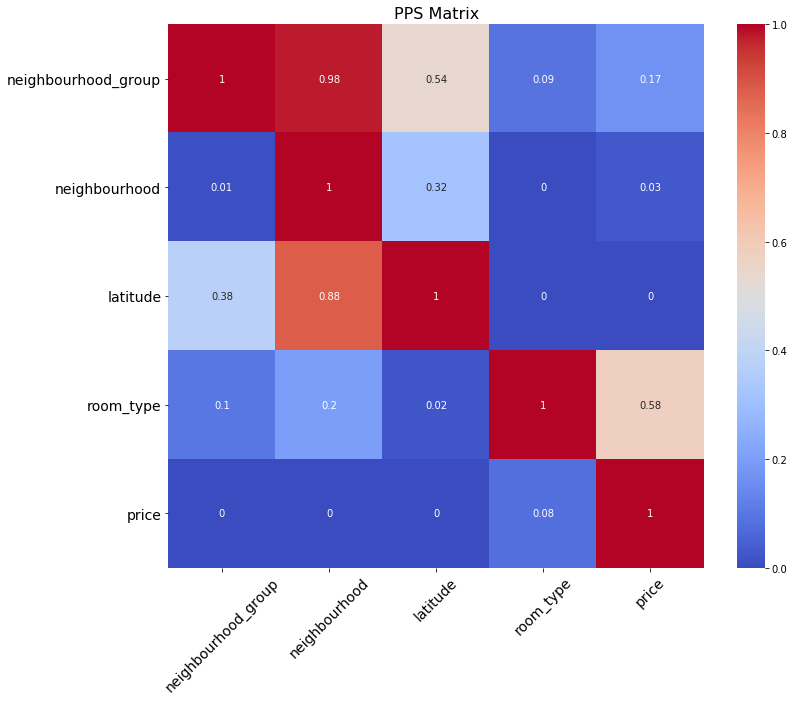

In [13]:
# Predictive power score matrix
import ppscore as pps

cols = ['neighbourhood_group', 'neighbourhood', 'latitude','room_type', 'price']
pps_df = pps.matrix(data[cols])
corrMatrix = pps_df.round(2)
eda.plot_corrmatrix(corrMatrix, "PPS Matrix")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1e34d3160>,
      dtype=object)

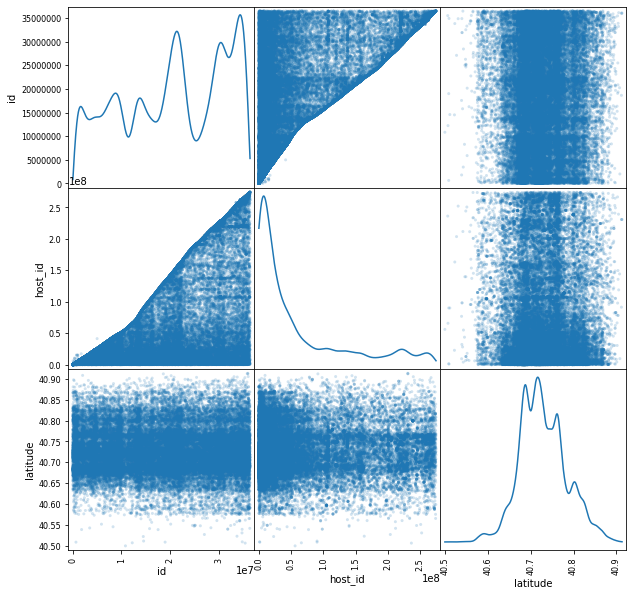

In [14]:
from pandas.plotting import scatter_matrix

col_numerical = list(data.select_dtypes([np.number]).columns)
scatter_matrix(data[col_numerical[:3]], alpha=0.2, figsize=(10, 10), diagonal='kde')

## EDA Correlations/Subgroup-populations - all to Columns


column: id , dtype: int64
compared_col: price
corr_pearson:  0.010618661200445018
Too many (or just one) unique values for box-plot

column: name , dtype: object
compared_col: price
nunique: 47905

column: host_id , dtype: int64
compared_col: price
corr_pearson:  0.015309076152975271
Too many (or just one) unique values for box-plot

column: host_name , dtype: object
compared_col: price
nunique: 11452

column: neighbourhood_group , dtype: object
compared_col: price
nunique: 5


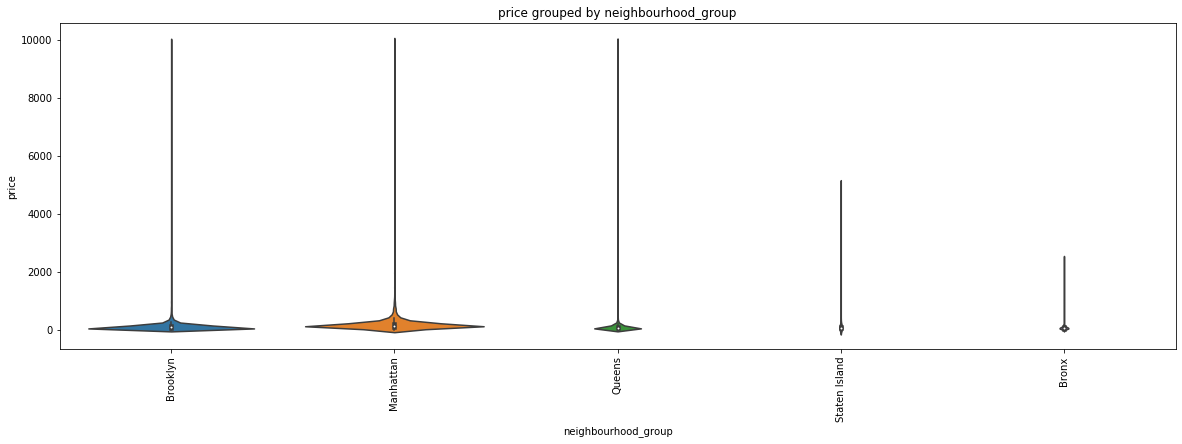

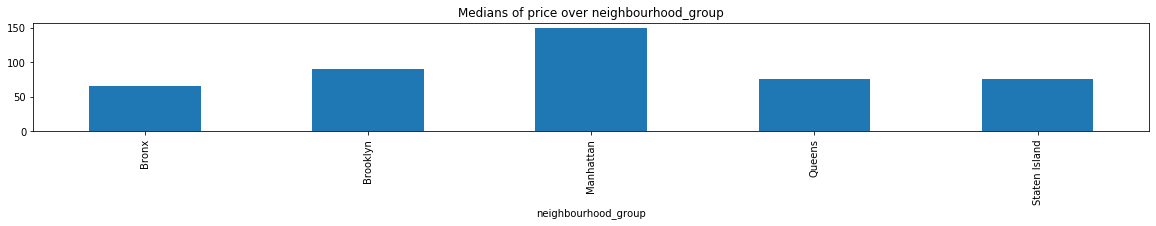


column: neighbourhood , dtype: object
compared_col: price
nunique: 221

column: latitude , dtype: float64
compared_col: price
corr_pearson:  0.033938668232625695
Too many (or just one) unique values for box-plot

column: longitude , dtype: float64
compared_col: price
corr_pearson:  -0.15001926996895357
Too many (or just one) unique values for box-plot

column: room_type , dtype: object
compared_col: price
nunique: 3


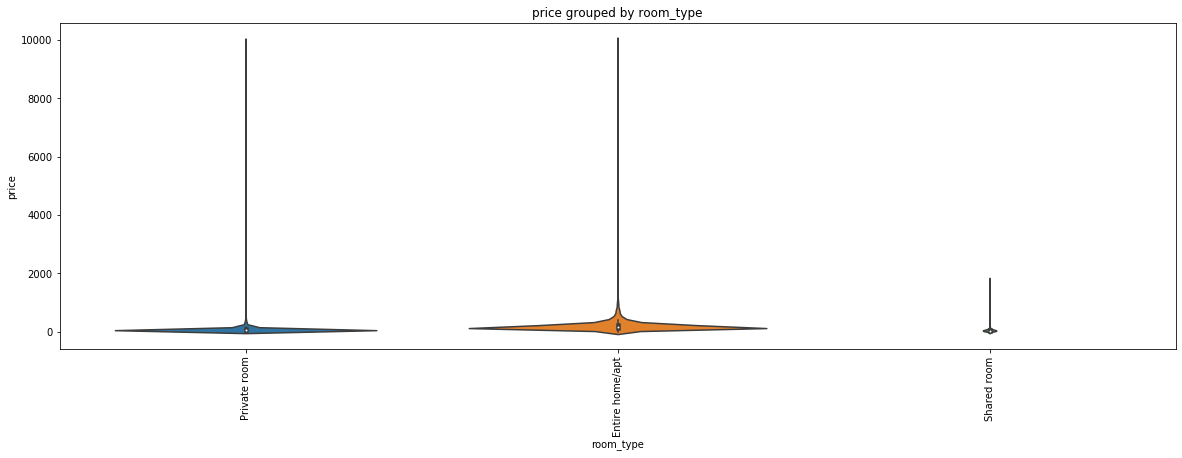

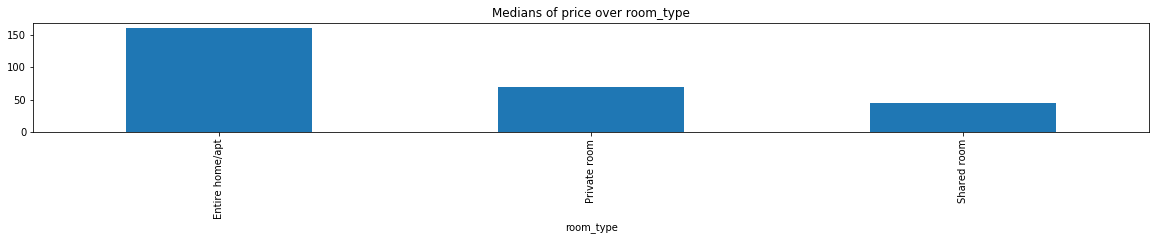


column: price , dtype: int64
compared_col: price
Too many (or just one) unique values for box-plot

column: minimum_nights , dtype: int64
compared_col: price
corr_pearson:  0.04279933414330347
Too many (or just one) unique values for box-plot

column: number_of_reviews , dtype: int64
compared_col: price
corr_pearson:  -0.04795422658266219
Too many (or just one) unique values for box-plot

column: last_review , dtype: datetime64[ns]
compared_col: price



corr_pearson:  -0.016664620647917613


/usr/local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



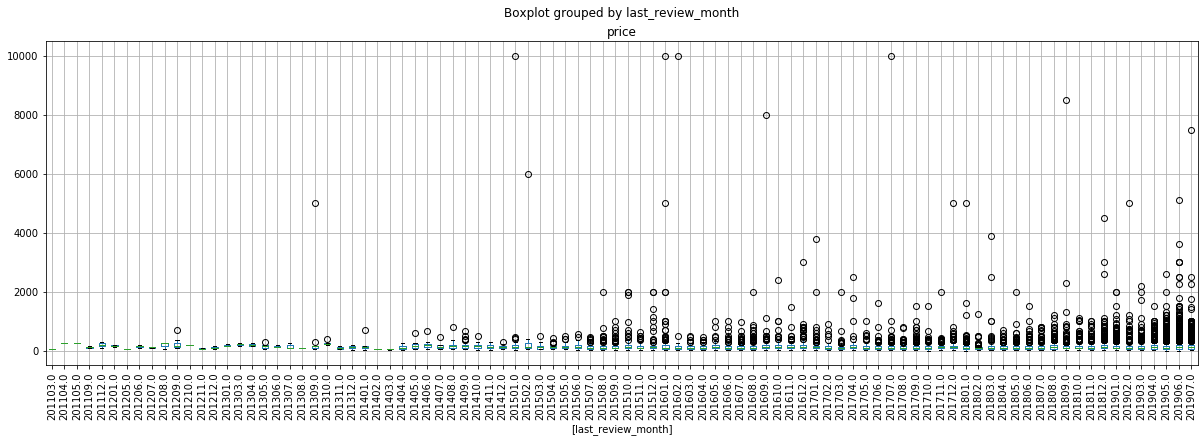

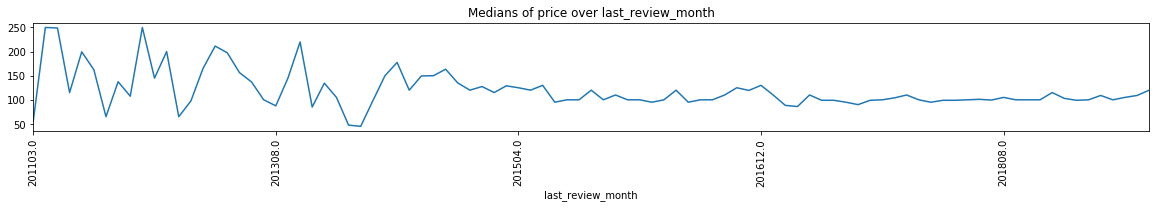

Too many (or just one) unique values for box-plot

column: reviews_per_month , dtype: float64
compared_col: price
corr_pearson:  -0.03060834856753313
Too many (or just one) unique values for box-plot

column: calculated_host_listings_count , dtype: int64
compared_col: price
corr_pearson:  0.057471688368067944
Too many (or just one) unique values for box-plot

column: availability_365 , dtype: int64
compared_col: price
corr_pearson:  0.08182882742168794
Too many (or just one) unique values for box-plot


In [15]:
compared_col_list = ["price"]
eda.eda_correlation_all_to_column(data, compared_col_list, 0.3)

# Histograms before and after outlier removal

Limit_edges:  [-90. 334.]


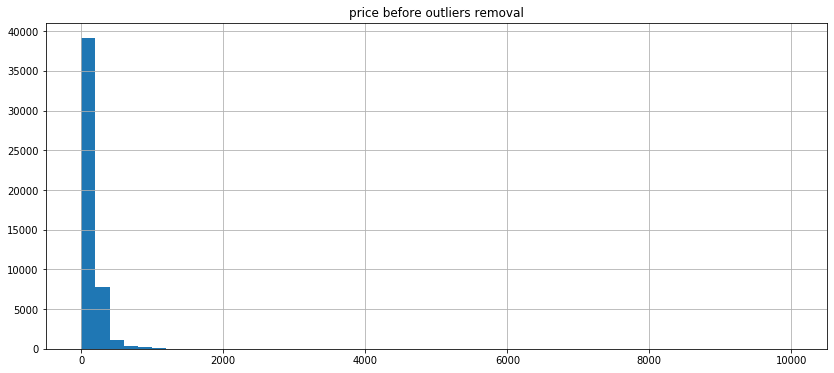

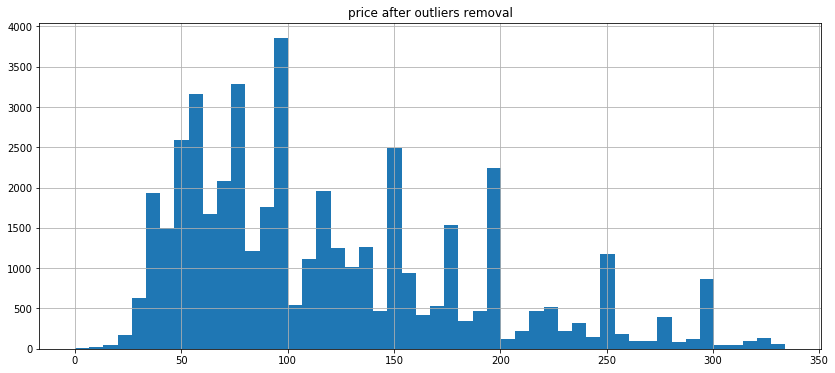

In [16]:
eda.get_hist_before_after_outlier_removal(data, "price")

# Generate_column_correlation_network

## Communites:

['availability_365', 'calculated_host_listings_count']
-------------------
['host_id']
-------------------
['id', 'number_of_reviews', 'reviews_per_month']
-------------------


## Network:

number of nodes: 6
number of edges: 7


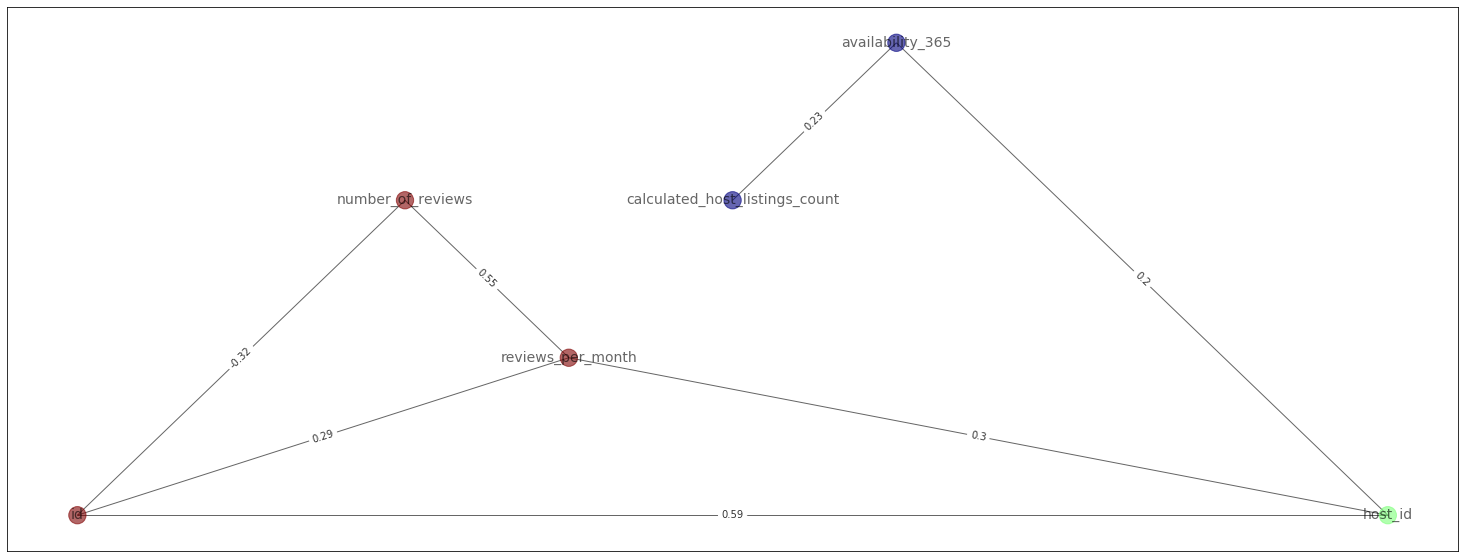

In [17]:
corr_threshold = 0.2
edge_labels_flag=True
layout = 'planar_layout' #'circular_layout','spring_layout','planar_layout',
eda.generate_column_correlation_network(data, corr_threshold, edge_labels_flag, layout)

## EDA for Text Columns
- number of words for a chosen column
- number of words of a chosen column compared to all relevant columns
- Wordcloud
- Token frequency
- Bigram frequency
- Simple topic modeling for a column

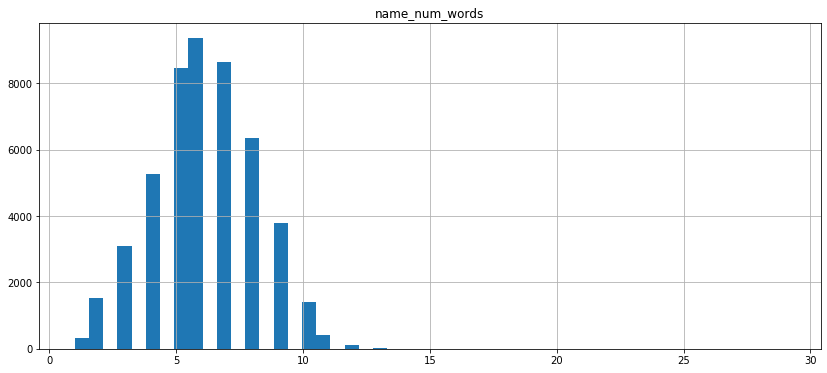


column: id , dtype: int64
compared_col: name_num_words
corr_pearson:  0.18544449402336807
Too many (or just one) unique values for box-plot

column: name , dtype: object
compared_col: name_num_words
nunique: 47905

column: host_id , dtype: int64
compared_col: name_num_words
corr_pearson:  0.09637914929752284
Too many (or just one) unique values for box-plot

column: host_name , dtype: object
compared_col: name_num_words
nunique: 11452

column: neighbourhood_group , dtype: object
compared_col: name_num_words
nunique: 5


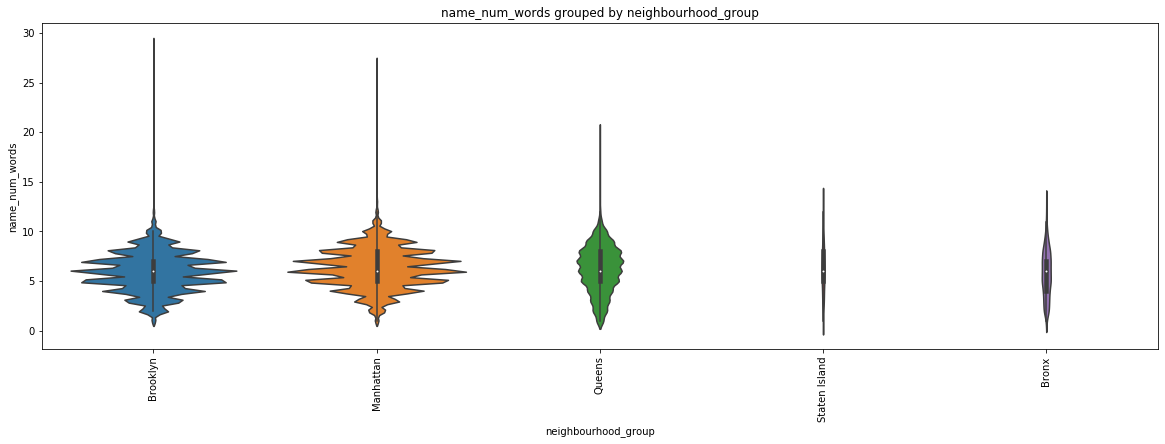

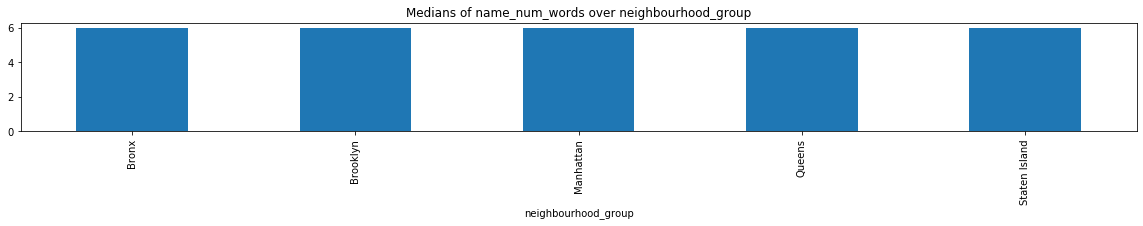


column: neighbourhood , dtype: object
compared_col: name_num_words
nunique: 221

column: latitude , dtype: float64
compared_col: name_num_words
corr_pearson:  0.02815410226152335
Too many (or just one) unique values for box-plot

column: longitude , dtype: float64
compared_col: name_num_words
corr_pearson:  -0.05227163703214027
Too many (or just one) unique values for box-plot

column: room_type , dtype: object
compared_col: name_num_words
nunique: 3


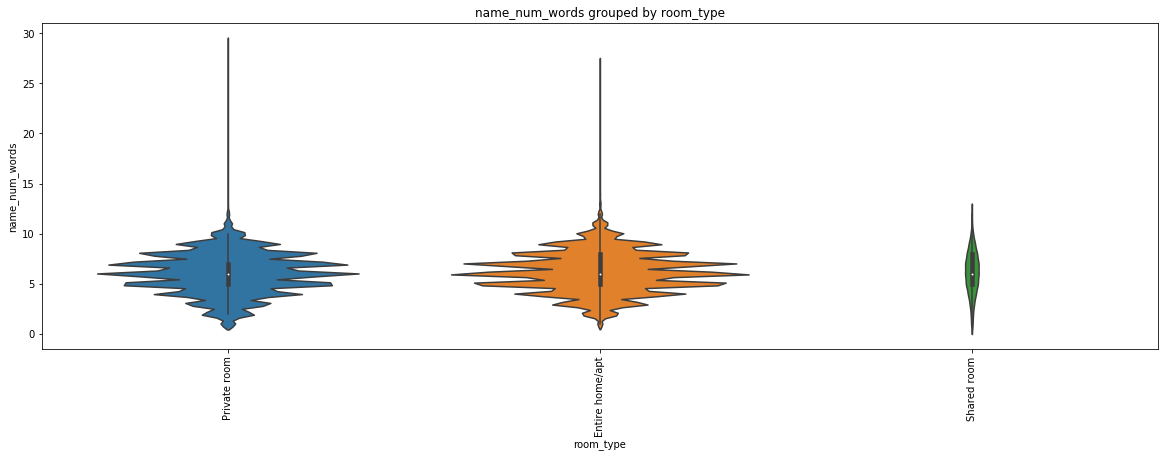

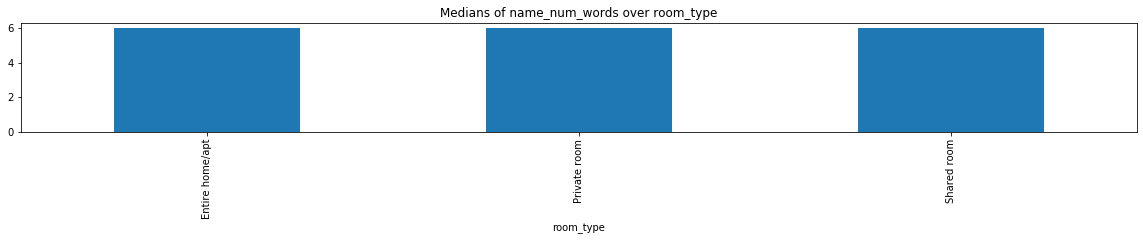


column: price , dtype: int64
compared_col: name_num_words
corr_pearson:  0.03320405361175281
Too many (or just one) unique values for box-plot

column: minimum_nights , dtype: int64
compared_col: name_num_words
corr_pearson:  0.03156702115275454
Too many (or just one) unique values for box-plot

column: number_of_reviews , dtype: int64
compared_col: name_num_words
corr_pearson:  -0.015593547988305728
Too many (or just one) unique values for box-plot

column: last_review , dtype: datetime64[ns]
compared_col: name_num_words



corr_pearson:  0.12647734469087596


/usr/local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



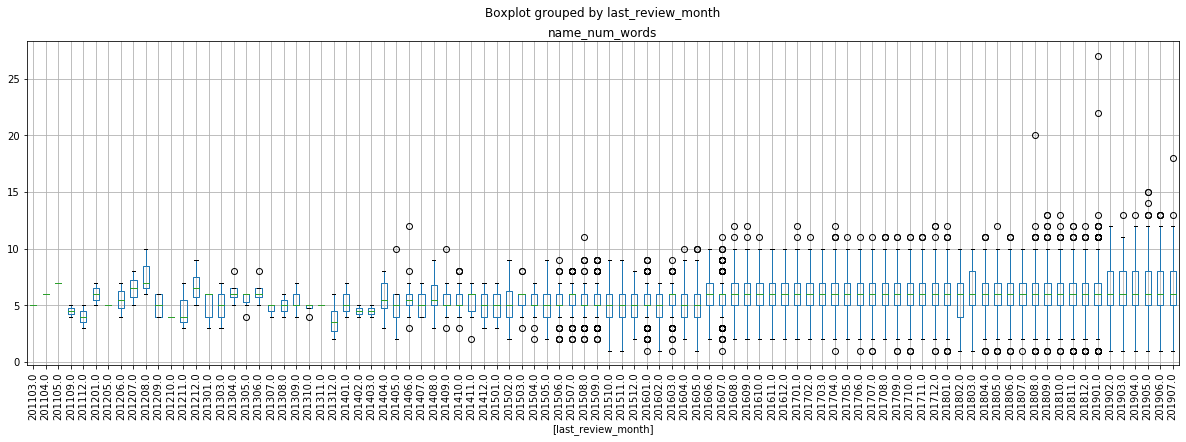

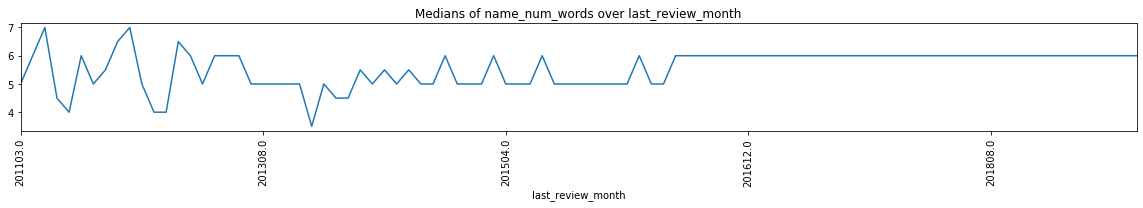

Too many (or just one) unique values for box-plot

column: reviews_per_month , dtype: float64
compared_col: name_num_words
corr_pearson:  0.0964478700071904
Too many (or just one) unique values for box-plot

column: calculated_host_listings_count , dtype: int64
compared_col: name_num_words
corr_pearson:  0.20317551940674278
Too many (or just one) unique values for box-plot

column: availability_365 , dtype: int64
compared_col: name_num_words
corr_pearson:  0.059978597827609836
Too many (or just one) unique values for box-plot

column: name_num_words , dtype: float64
compared_col: name_num_words
Too many (or just one) unique values for box-plot


In [18]:
col = "name"
num_words_col = col+"_num_words"
eda.explore_num_words_for_col(data, col)
eda.eda_correlation_all_to_column(data, num_words_col)

# Wordcloud

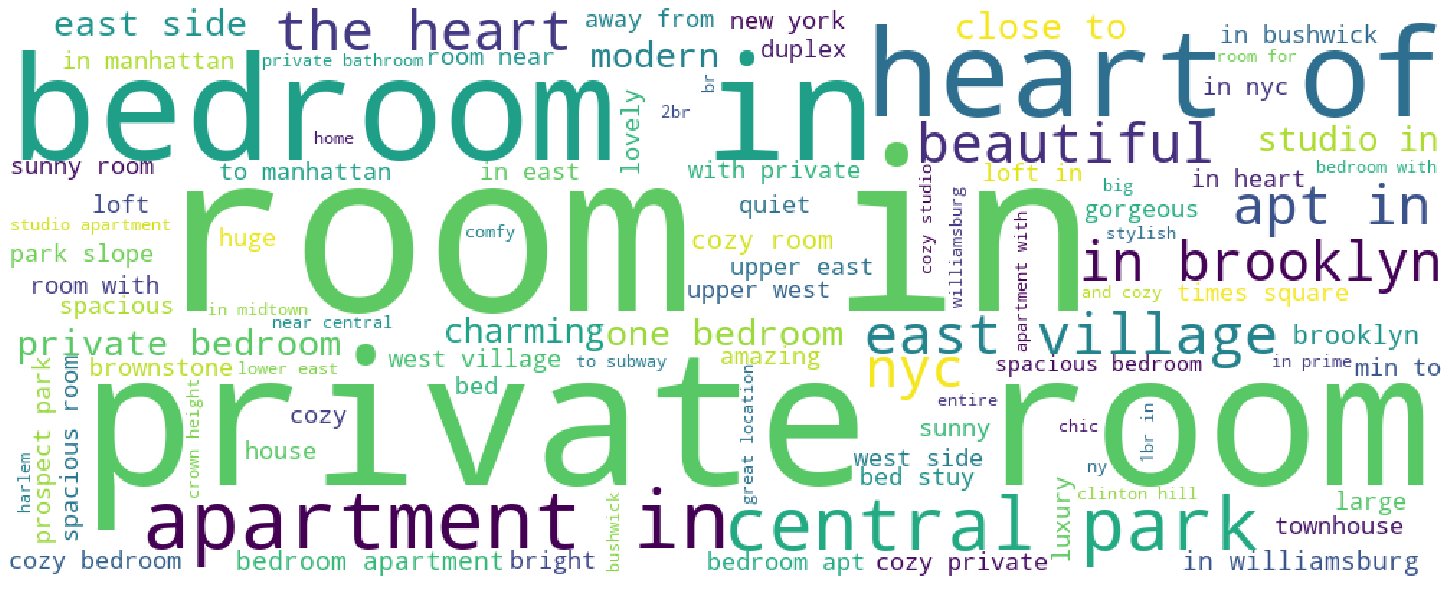

In [19]:
eda.generate_wordcloud_for_col(data, "name")    

# Top Tokens frequency - Unigrams and Bigrams

In [20]:
eda.get_top_word_frequency_col(data, "name")   
eda.get_top_bigrams_frequency_col(data, "name")

/usr/local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.



Top Word frequencies:


,count
room,10281
bedroom,8205
private,7409
apartment,6760
cozy,5097
apt,4740
brooklyn,4175
studio,4106
spacious,3796
manhattan,3592


Top Bigrams frequencies:


,count
private room,2893
central park,1355
east village,1321
private bedroom,1059
bedroom apartment,902
cozy room,872
upper east,694
times square,670
west village,641
new york,622


# Simple Topic Modeling for Columns

Topic #0: home manhattan room subway near
Topic #1: loft bedroom apartment luxury williamsburg
Topic #2: room private bedroom cozy brooklyn
Topic #3: park central new near apartment
Topic #4: east village studio west location



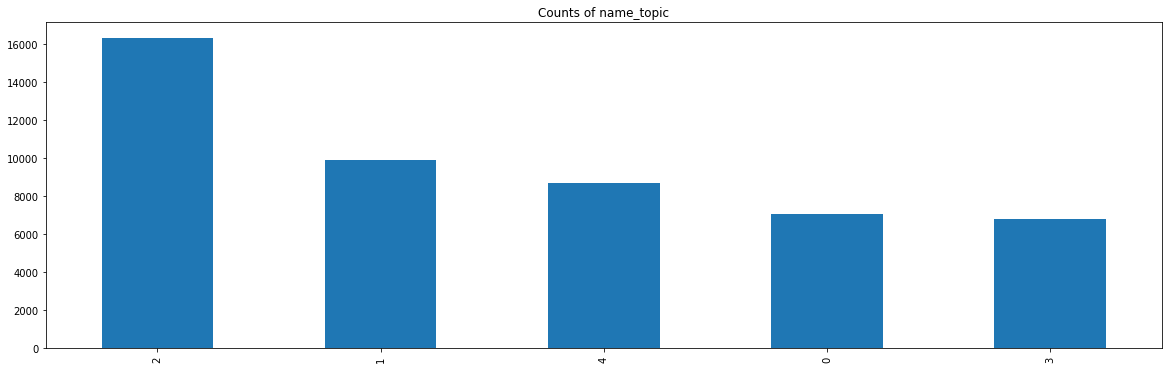

In [21]:
col = "name"
num_topic = 5
top_words_for_topic = 5
eda.simple_topic_modeling_for_col(data, col, num_topic, top_words_for_topic)

# Unique Text Clusters

In [22]:
col = "name"
unique_str_list = list(data[col].astype(str).unique()) #[:10000]
print("number of unique values:", len(unique_str_list) )

text_clusters_df =  eda.get_text_cluster_df_from_unique_str_list(unique_str_list)

number of unique values: 47906
counter: 0
[exp msg] elapsed time for subprocess: 00:00:00
counter: 5000
[exp msg] elapsed time for subprocess: 00:00:09
counter: 10000
[exp msg] elapsed time for subprocess: 00:00:19
counter: 15000
[exp msg] elapsed time for subprocess: 00:00:28
counter: 20000
[exp msg] elapsed time for subprocess: 00:00:38
counter: 25000
[exp msg] elapsed time for subprocess: 00:00:48
counter: 30000
[exp msg] elapsed time for subprocess: 00:00:58
counter: 35000
[exp msg] elapsed time for subprocess: 00:01:08
counter: 40000
[exp msg] elapsed time for subprocess: 00:01:18
counter: 45000
[exp msg] elapsed time for subprocess: 00:01:28
[exp msg] elapsed time for process: 00:01:34
counter: 0
len(singelton_list): 36659
len(pair_comparisons_list): 24122
set_connected_components: 2529
number of nodes in graph G:  39188
number of edges in graph G:  2212
number_connected_components in G:  37667


In [23]:
pd.set_option('display.max_colwidth', 500)
text_clusters_df

,unique_str_list,num_unique_str
68,"{1 private bedroom in Williamsburg, Private bedroom in Williamsburg, Private Bedroom in Williamsburg!, Private Room in Williamsburg, Private room in Williamsburg loft, Private 1 bedroom in Williamsburg, Private Bedroom in Williamsburg, Private Room in Williamsburg BK, Private Room in E. Williamsburg, Private room in Williamsburg, Private Room in Williamsburg!, Private Room in Williamsburg Apt, Private room in Williamsburg apt, Private Bedroom in East Williamsburg, Private Room in East Willi...",19
902,"{Sonder | Stock Exchange | Lovely 1BR + Lounge, Sonder | Stock Exchange | Cozy 1BR + Lounge, Sonder | Stock Exchange | Artsy 1BR + Laundry, Sonder | Stock Exchange | Simple 1BR + Lounge, Sonder | Stock Exchange | Smart 1BR + Laundry, Sonder | Stock Exchange | Cozy 1BR + Laundry, Sonder | Stock Exchange | Lively 1BR + Lounge, Sonder | Stock Exchange | Chic 1BR + Laundry, Sonder | Stock Exchange | Warm 1BR + Laundry, Sonder | Stock Exchange | Divine 1BR + Lounge, Sonder | Stock Exchange | Airy...",18
104,"{Private room in Upper East Side #5, Private Room, Upper East Side, Private Bedroom on Upper West Side, Private room in Upper East Side, Private Room in Upper West Side, Private room in Upper West Side, Private room in Lower East Side, Private Room in Upper East Side, Private Room Upper West Side, Private Bedroom on Upper East Side, Private Room-Upper East Side, Private room on Upper East Side, Private room in Upper East Side #14, Private Room In Upper East Side, Private Room on Upper West ...",16
907,"{Sonder | Stock Exchange | Ideal 1BR + Sofa Bed, Sonder | Stock Exchange | Glam 1BR + Sofa Bed, Sonder | Stock Exchange | Chic 1BR + Sofa Bed, Sonder | Stock Exchange | Sunny 1BR + Sofa Bed, Sonder | Stock Exchange | Sunny 3BR + Sofa Bed, Sonder | Stock Exchange | Sleek 3BR + Sofa Bed, Sonder | Stock Exchange | Lively 1BR + Sofa Bed, Sonder | Stock Exchange | Smart 1BR + Sofa Bed, Sonder | Stock Exchange | Airy 1BR + Sofa Bed, Sonder | Stock Exchange | Stunning 1BR + Sofa Bed, Sonder | Stock...",15
780,"{*NO GUEST SERVICE FEE* Beekman Tower Studio Suite #2, *NO GUEST SERVICE FEE* Beekman Tower Studio Suite #7, *NO GUEST SERVICE FEE* Beekman Tower Studio Suite #1, *NO GUEST SERVICE FEE* Beekman Tower Studio Suite #9, *NO GUEST SERVICE FEE* Beekman Tower Studio Suite #8, *NO GUEST SERVICE FEE* Beekman Tower Studio Suite #11, *NO GUEST SERVICE FEE* Beekman Tower Studio Suite #5, *NO GUEST SERVICE FEE* Beekman Tower Studio Suite #12, *NO GUEST SERVICE FEE* Beekman Tower Studio Suite #4...",13
...,...,...
13219,{Bright Open Bedroom at the Heart of Wall Street},1
13218,{Beautiful Private Room Near Hudson River},1
13217,"{East Village duplex: peaceful, bright & cheerful}",1
13216,{2bdrm apt w/private backyard in Artsy Bushwick},1


# EDA for Mulitvariate Time Series

In [24]:
filename = "nasdaq_stocks.csv"
data = pd.read_csv(filename)
print(data.shape)
data.head(5)

(808, 18)


,date,FB,GOOGL,AMZN,DELL,IBM,INTC,AAPL,MSFT,CSCO,ORCL,NVDA,VMW,HPQ,AMD,TSM,TXN,QCOM
0,2016-01-04,102.22,759.44,636.99,NaN,119.2253,31.0178,99.4989,51.0656,23.9163,34.1057,31.8157,46.7698,10.5034,2.770,20.1865,49.9251,44.2740
1,2016-01-05,102.73,761.53,633.79,NaN,119.1376,30.8718,97.0055,51.2986,23.8076,34.0008,32.3268,47.3679,10.6030,2.750,20.0586,49.4014,43.4083
2,2016-01-06,102.97,759.33,632.65,NaN,118.5413,30.1874,95.1072,50.3667,23.5541,34.1725,30.9901,45.8975,10.2227,2.505,19.5012,49.0798,42.9666
3,2016-01-07,97.92,741.00,607.94,NaN,116.5155,29.0558,91.0932,48.6148,23.0107,33.4284,29.7615,45.2911,9.7519,2.275,19.2818,47.4996,40.7582
4,2016-01-08,97.33,730.91,607.05,NaN,115.4368,28.7547,91.5749,48.7639,22.4402,33.0563,29.1226,44.9422,9.5798,2.140,19.0168,46.2684,40.5241


In [25]:
# Auto infer date
data = eda.infer_date_col(data)

col: date was transformed to date


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 18 columns):
date     808 non-null datetime64[ns]
FB       808 non-null float64
GOOGL    808 non-null float64
AMZN     808 non-null float64
DELL     60 non-null float64
IBM      808 non-null float64
INTC     808 non-null float64
AAPL     808 non-null float64
MSFT     808 non-null float64
CSCO     808 non-null float64
ORCL     808 non-null float64
NVDA     808 non-null float64
VMW      808 non-null float64
HPQ      808 non-null float64
AMD      808 non-null float64
TSM      808 non-null float64
TXN      808 non-null float64
QCOM     808 non-null float64
dtypes: datetime64[ns](1), float64(17)
memory usage: 113.8 KB


None


Percentage of missing data:
col:date, missing values: 0.0%
col:FB, missing values: 0.0%
col:GOOGL, missing values: 0.0%
col:AMZN, missing values: 0.0%
col:DELL, missing values: 0.9257425742574258%
col:IBM, missing values: 0.0%
col:INTC, missing values: 0.0%
col:AAPL, missing values: 0.0%
col:MSFT, missing values: 0.0%
col:CSCO, missing values: 0.0%
col:ORCL, missing values: 0.0%
col:NVDA, missing values: 0.0%
col:VMW, missing values: 0.0%
col:HPQ, missing values: 0.0%
col:AMD, missing values: 0.0%
col:TSM, missing values: 0.0%
col:TXN, missing values: 0.0%
col:QCOM, missing values: 0.0%


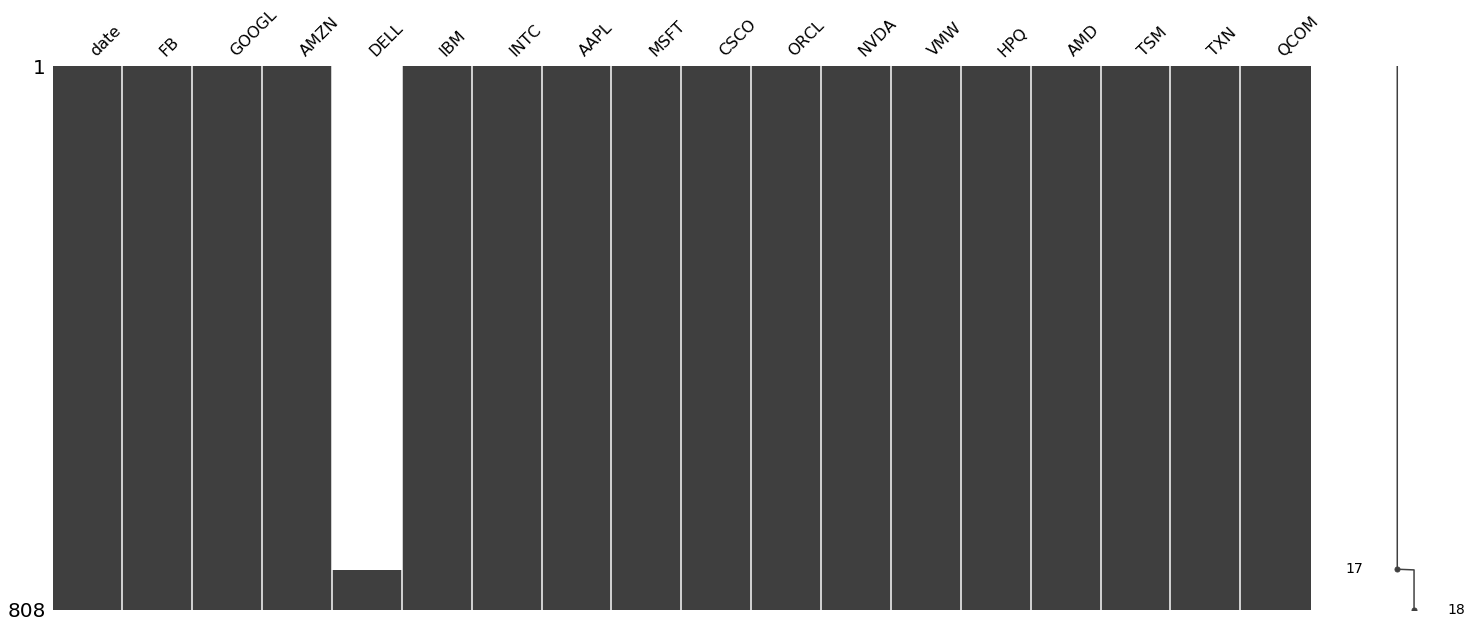

In [26]:
# missing data
eda.missing_data(data)

# Plot time series

## Column: FB, dtype:float64

count: 808
nunique: 773
isnull sum: 0
zero count: 0
max: 217.5 min: 94.16


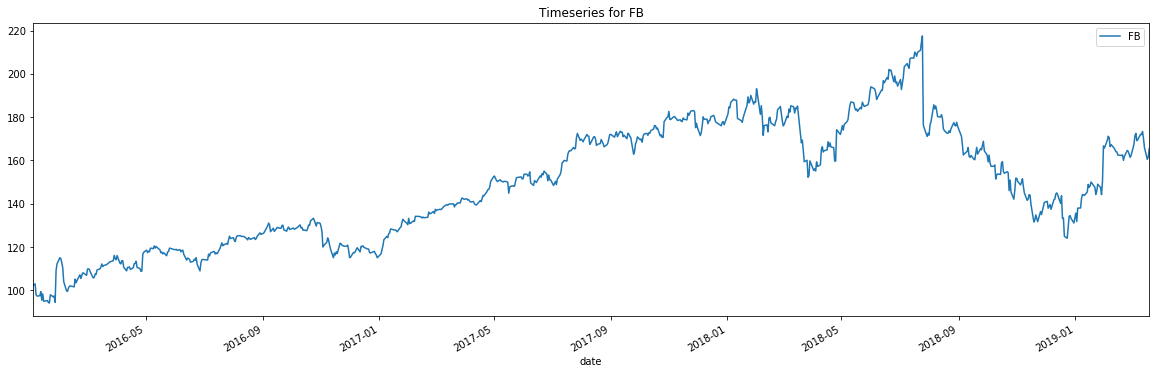

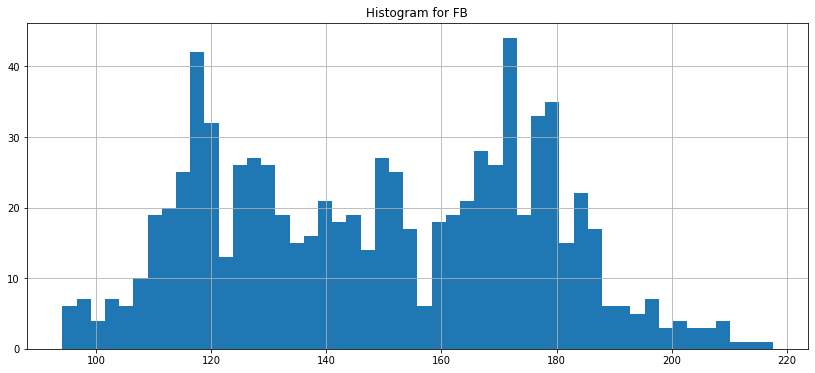

----

## Column: GOOGL, dtype:float64

count: 808
nunique: 799
isnull sum: 0
zero count: 0
max: 1285.5 min: 681.14


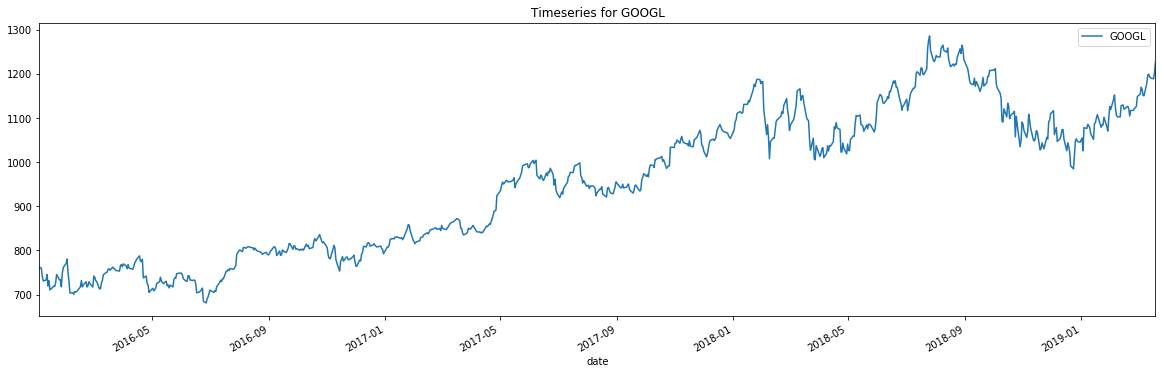

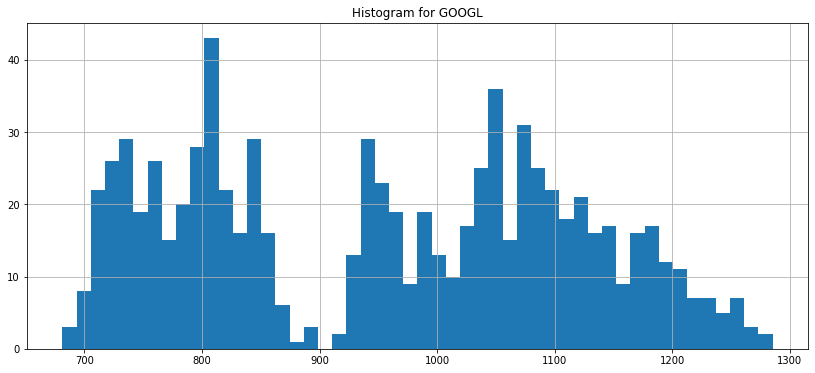

----

## Column: AMZN, dtype:float64

count: 808
nunique: 800
isnull sum: 0
zero count: 0
max: 2039.51 min: 482.07


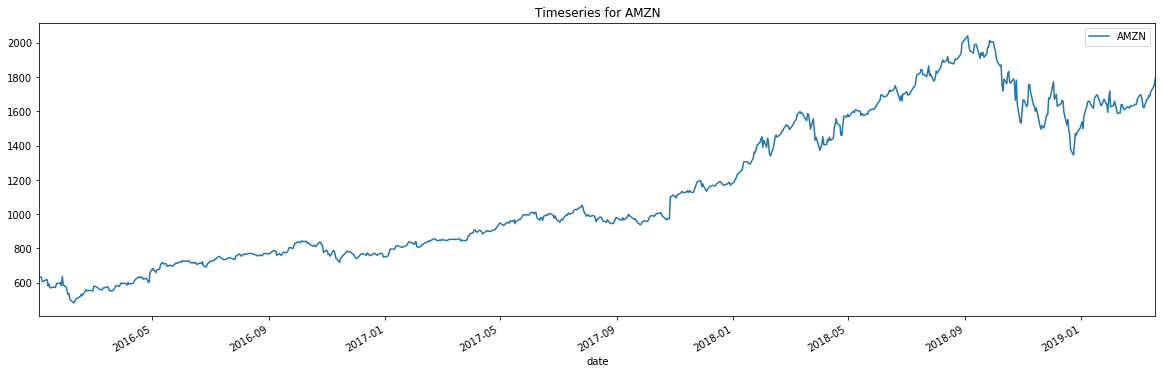

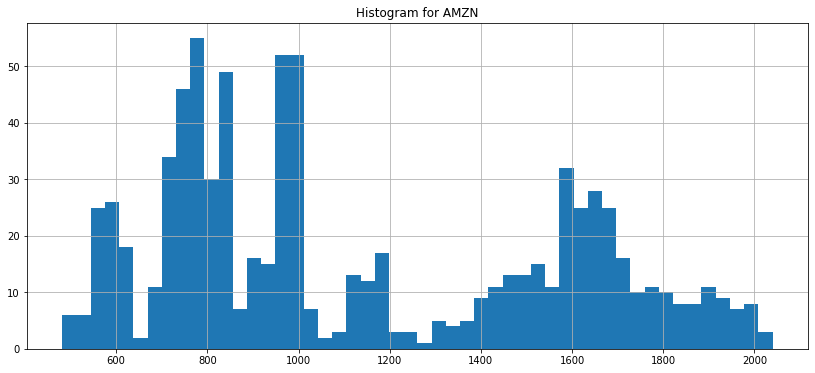

----

## Column: DELL, dtype:float64

count: 60
nunique: 58
isnull sum: 748
zero count: 0
max: 60.49 min: 42.1733


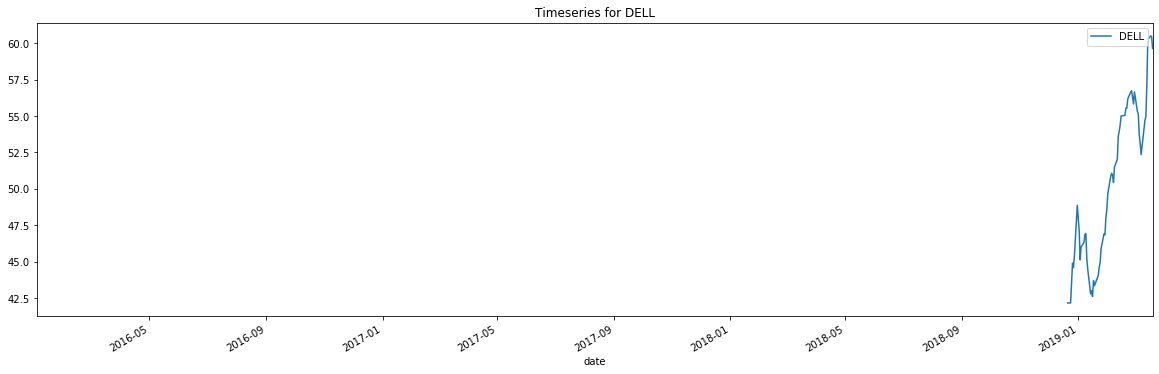

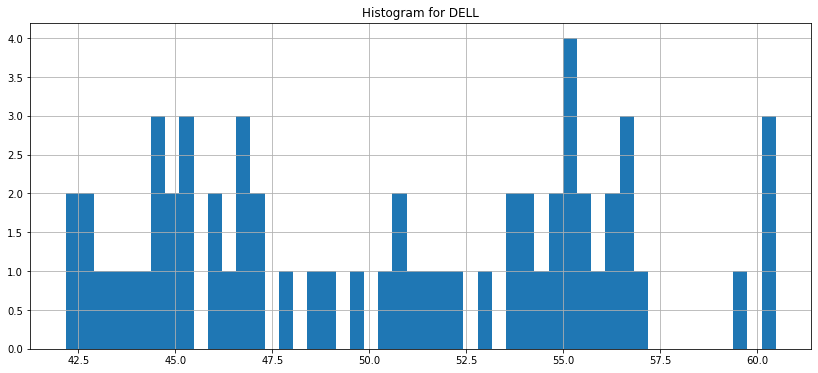

----

## Column: IBM, dtype:float64

count: 808
nunique: 792
isnull sum: 0
zero count: 0
max: 166.9564 min: 104.4077


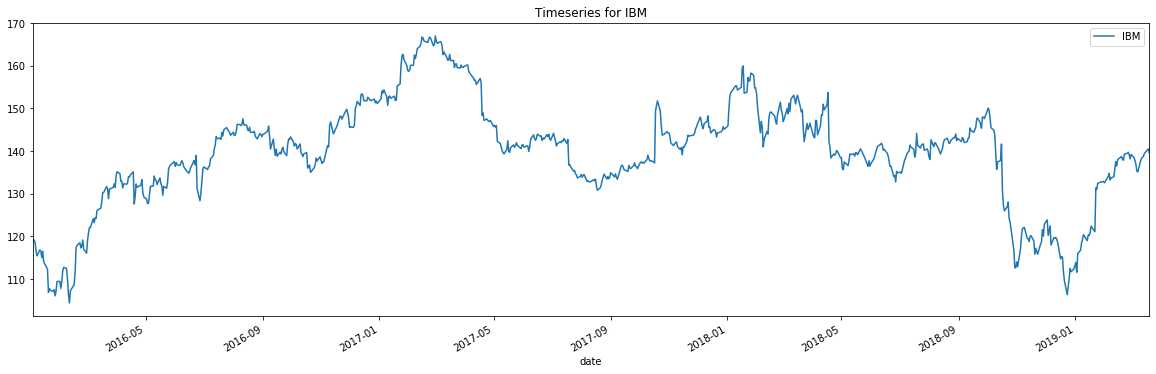

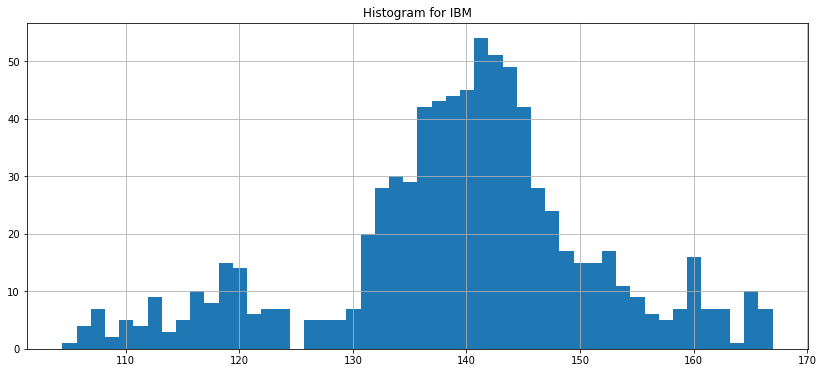

----

## Column: INTC, dtype:float64

count: 808
nunique: 750
isnull sum: 0
zero count: 0
max: 56.025 min: 25.979


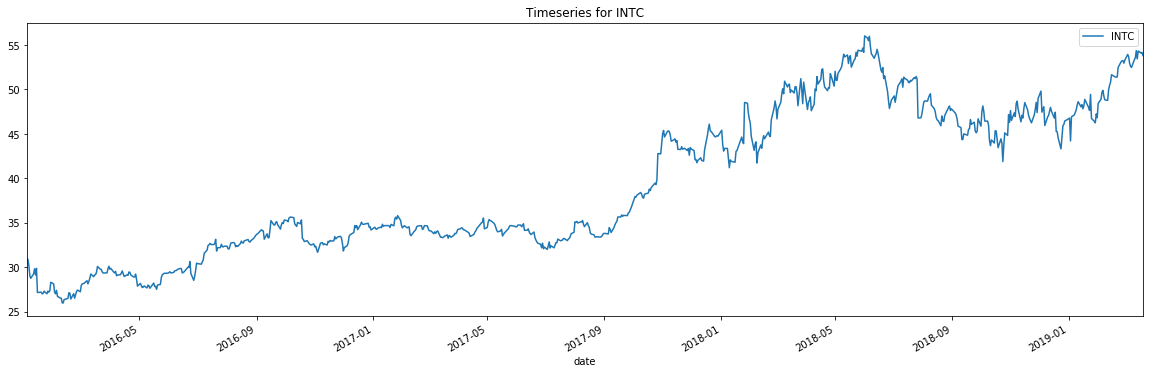

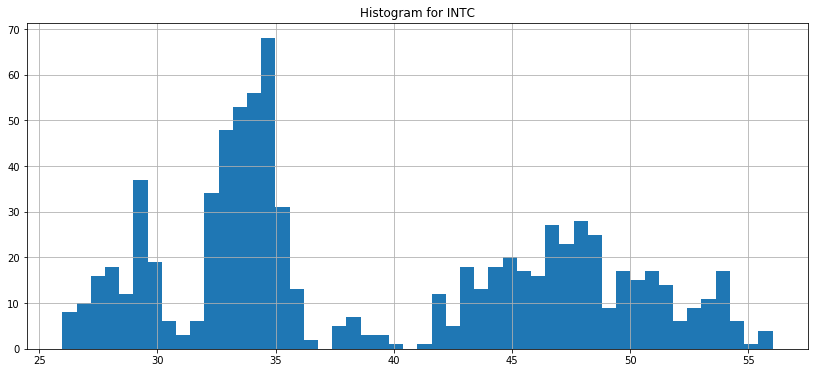

----

## Column: AAPL, dtype:float64

count: 808
nunique: 792
isnull sum: 0
zero count: 0
max: 230.2754 min: 86.3079


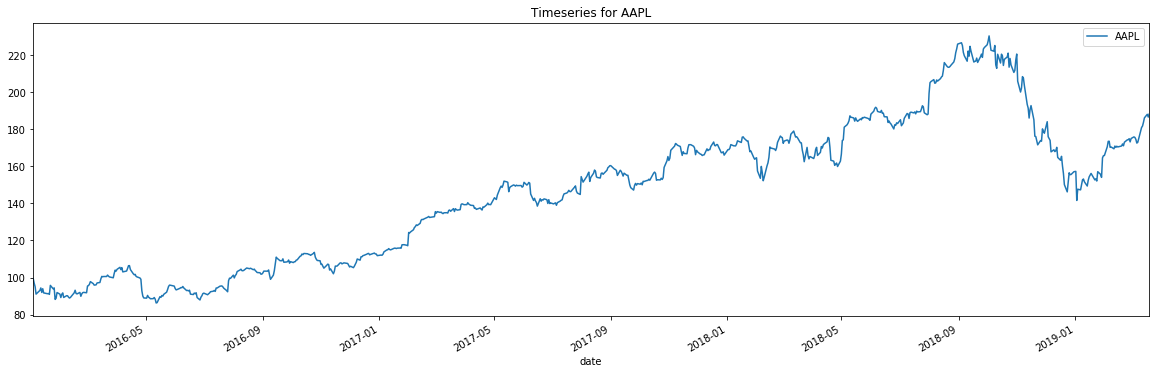

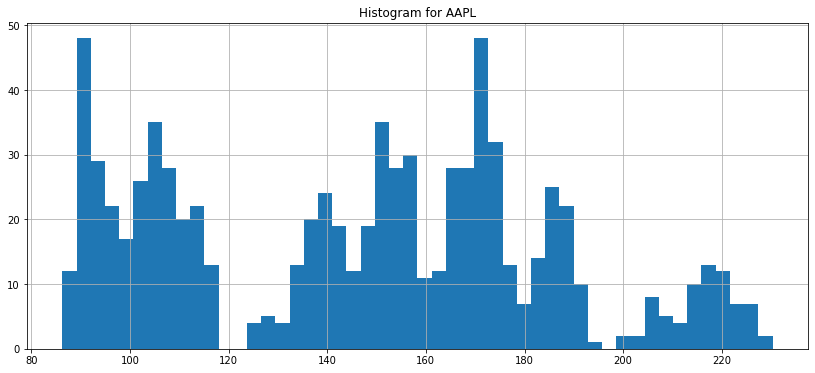

----

## Column: MSFT, dtype:float64

count: 808
nunique: 764
isnull sum: 0
zero count: 0
max: 117.65 min: 45.7717


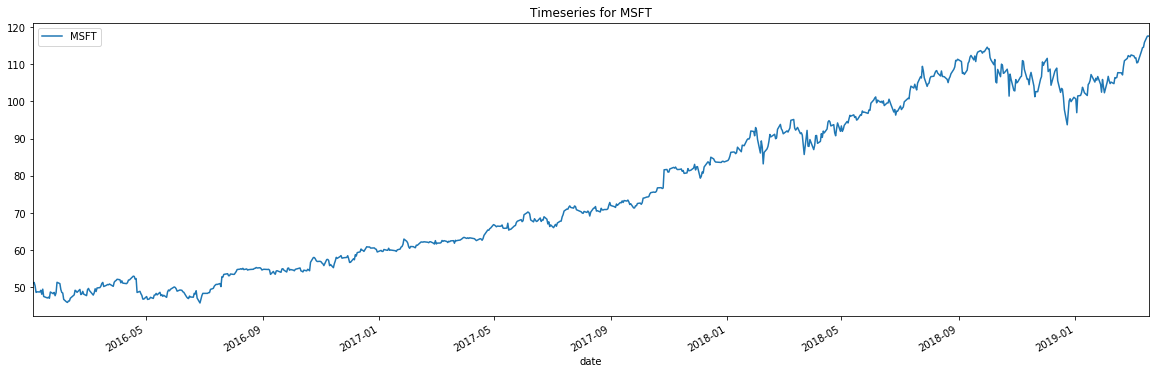

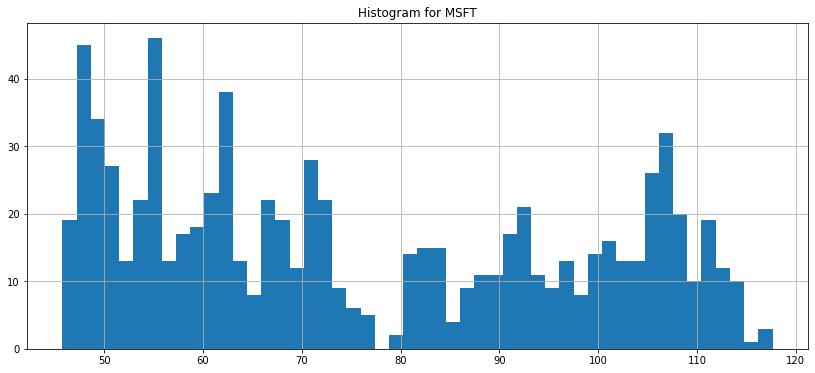

----

## Column: CSCO, dtype:float64

count: 808
nunique: 732
isnull sum: 0
zero count: 0
max: 53.51 min: 20.3845


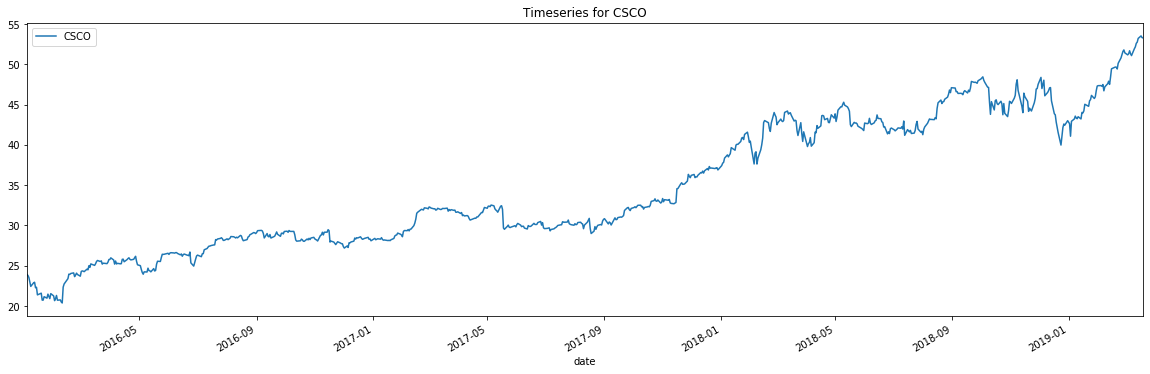

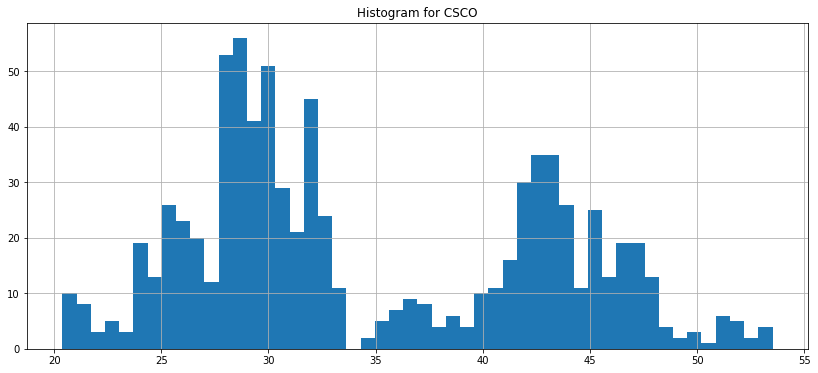

----

## Column: ORCL, dtype:float64

count: 808
nunique: 735
isnull sum: 0
zero count: 0
max: 54.04 min: 32.379


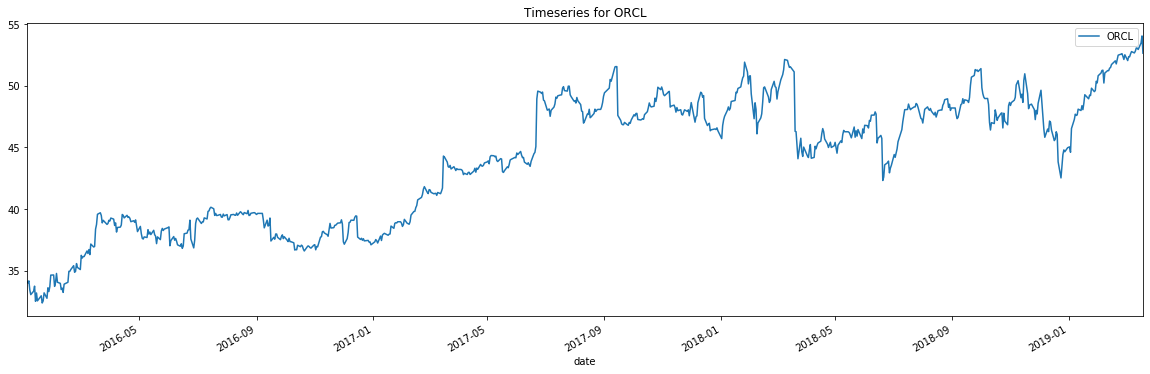

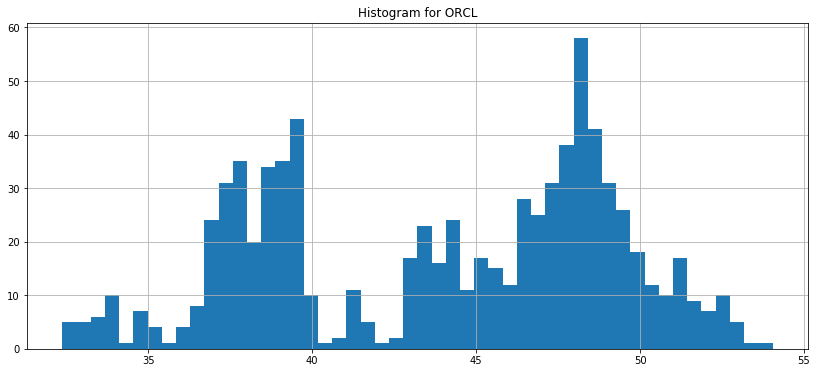

----

## Column: NVDA, dtype:float64

count: 808
nunique: 795
isnull sum: 0
zero count: 0
max: 288.7729 min: 24.7881


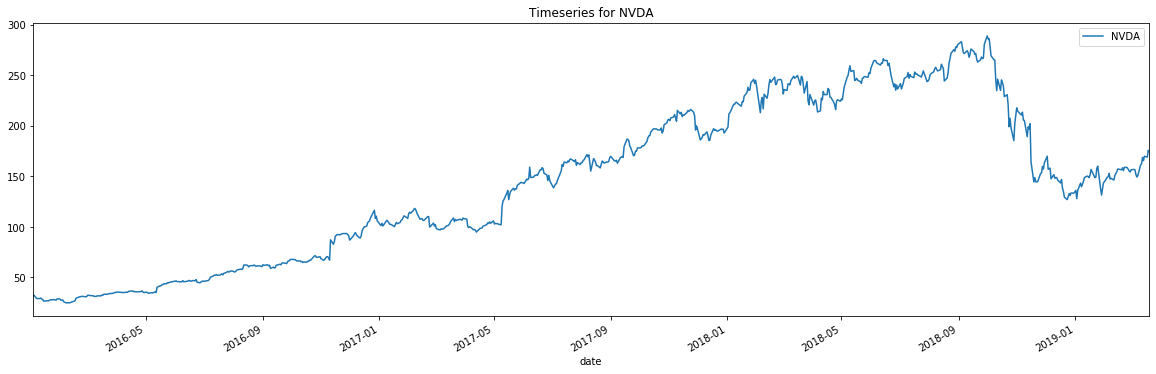

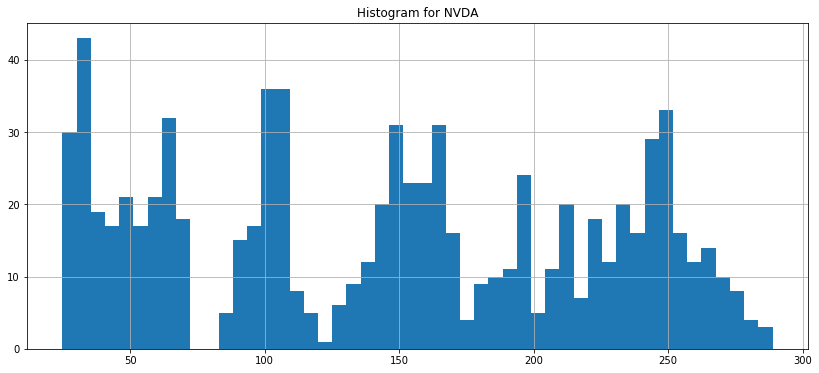

----

## Column: VMW, dtype:float64

count: 808
nunique: 777
isnull sum: 0
zero count: 0
max: 184.85 min: 36.4189


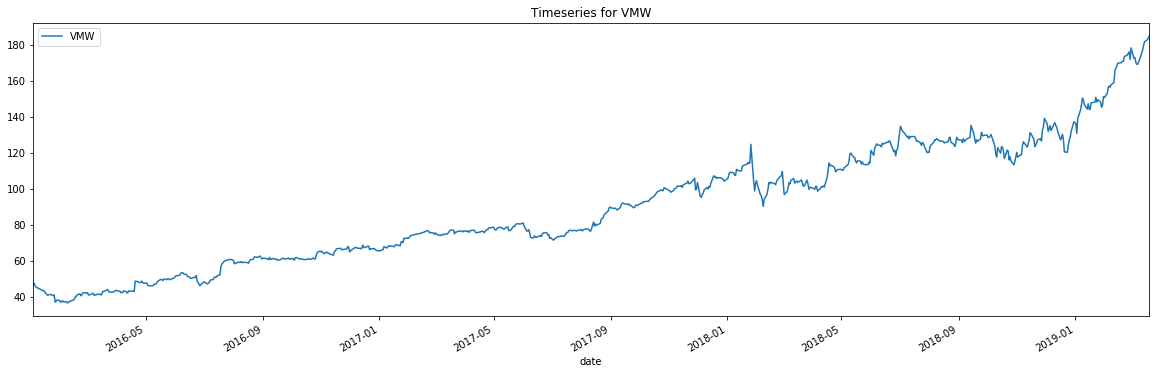

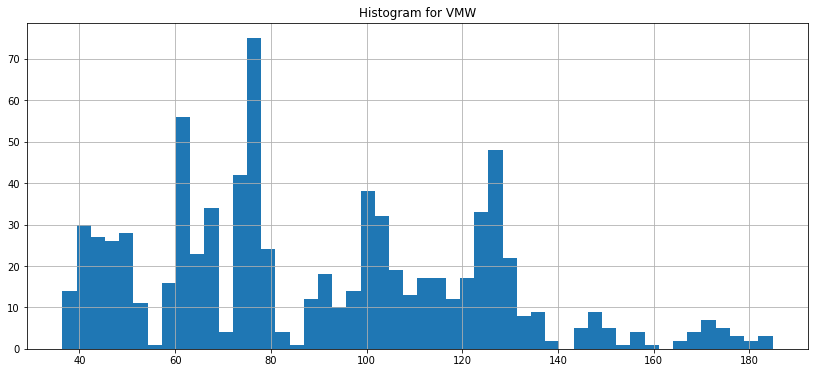

----

## Column: HPQ, dtype:float64

count: 808
nunique: 703
isnull sum: 0
zero count: 0
max: 26.0116 min: 8.1673


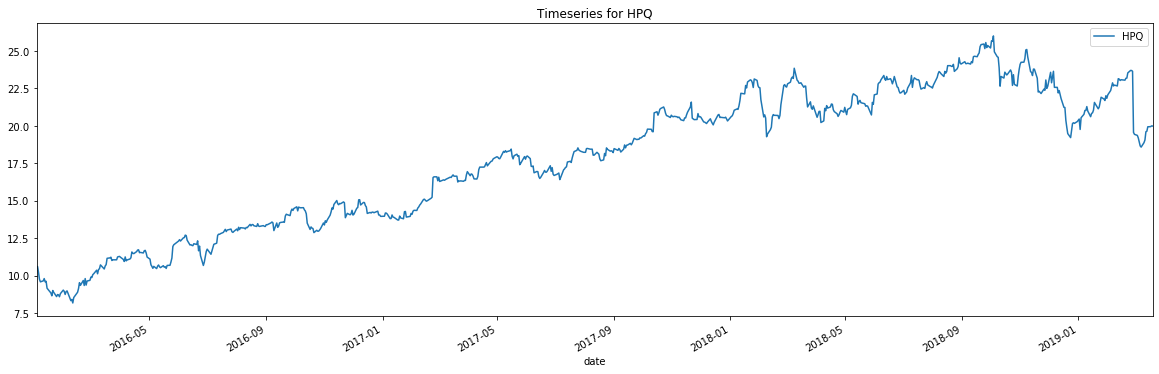

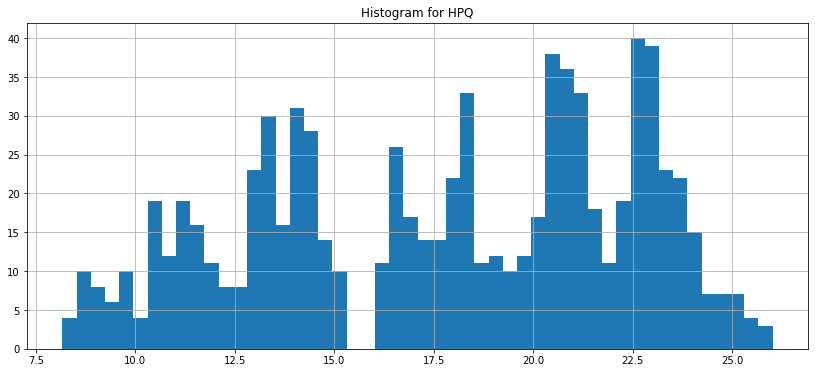

----

## Column: AMD, dtype:float64

count: 808
nunique: 643
isnull sum: 0
zero count: 0
max: 32.72 min: 1.8


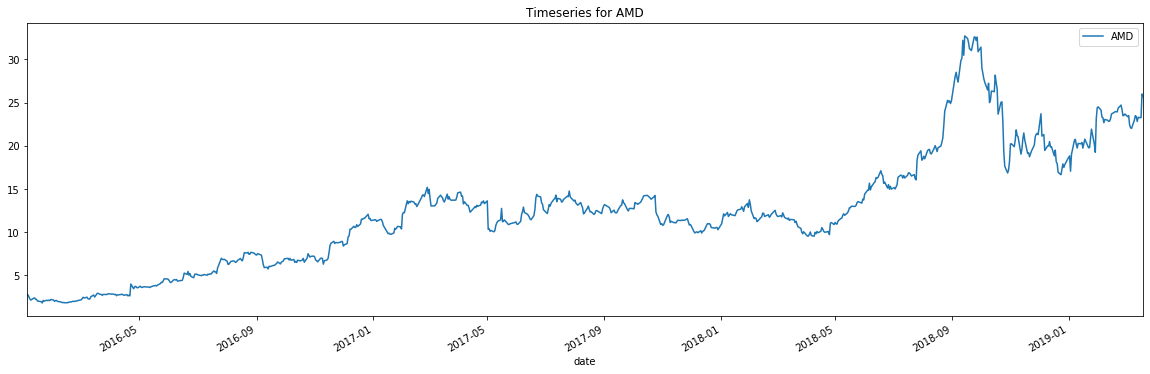

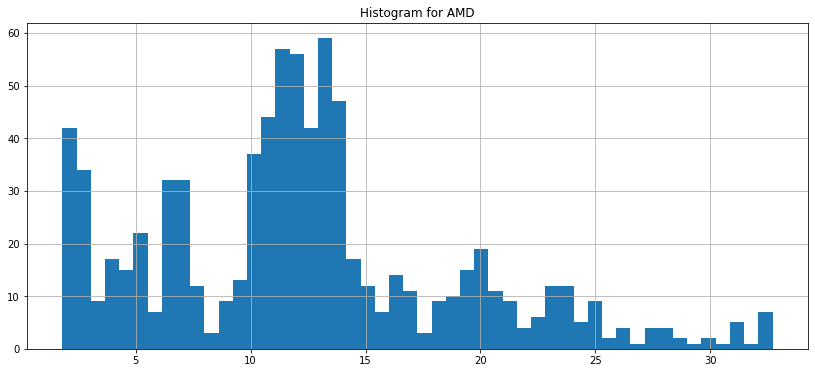

----

## Column: TSM, dtype:float64

count: 808
nunique: 701
isnull sum: 0
zero count: 0
max: 44.89 min: 18.7153


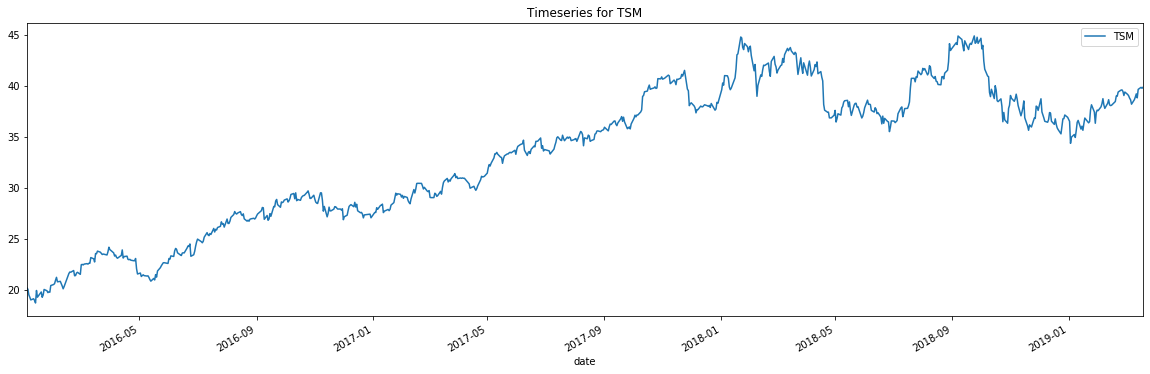

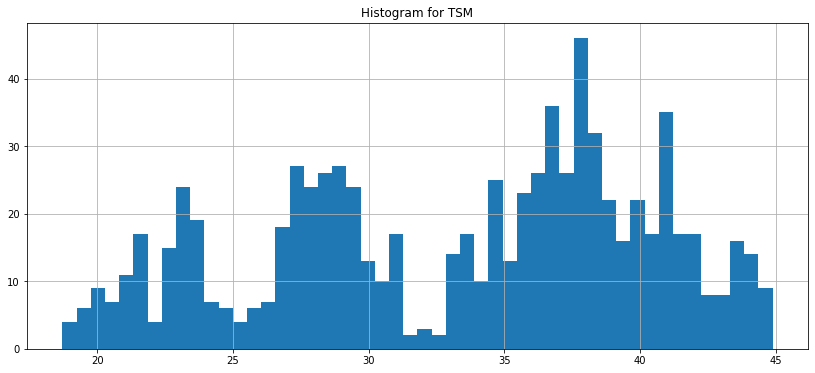

----

## Column: TXN, dtype:float64

count: 808
nunique: 771
isnull sum: 0
zero count: 0
max: 115.9699 min: 44.1277


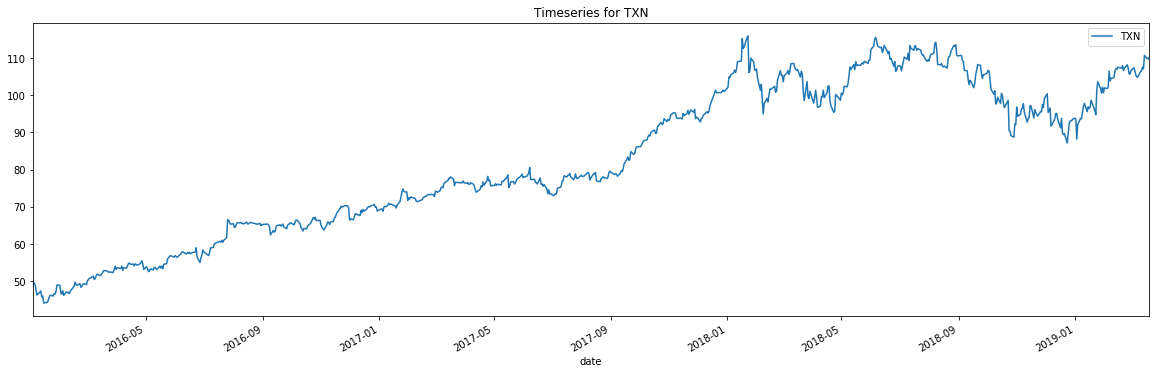

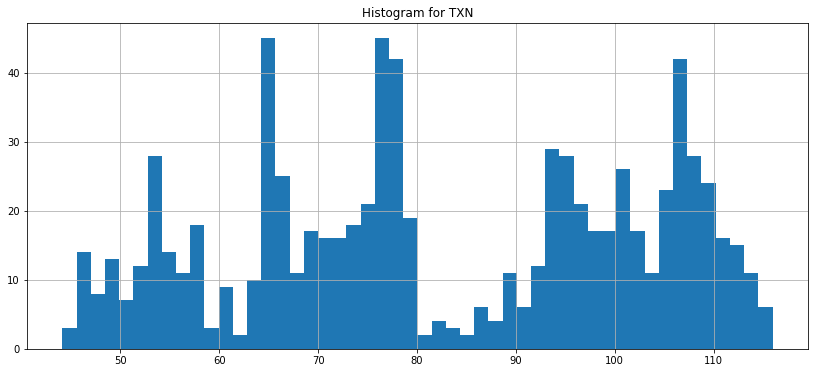

----

## Column: QCOM, dtype:float64

count: 808
nunique: 777
isnull sum: 0
zero count: 0
max: 73.4297 min: 37.9491


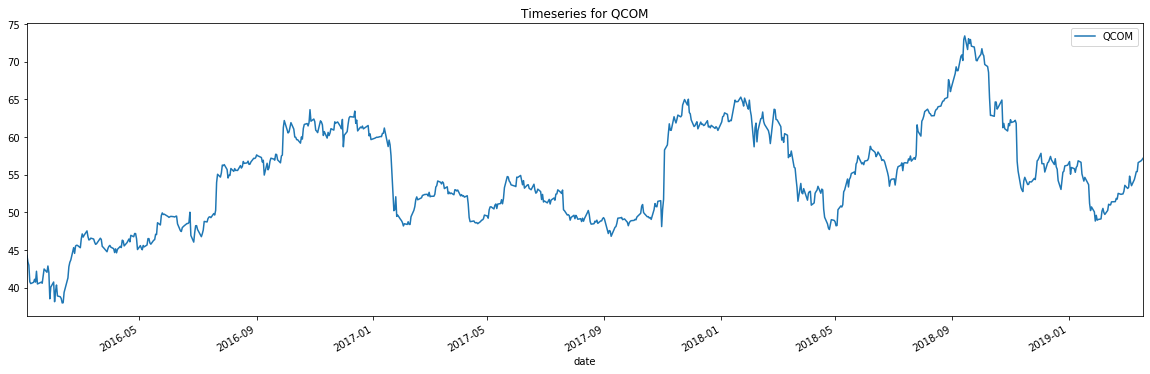

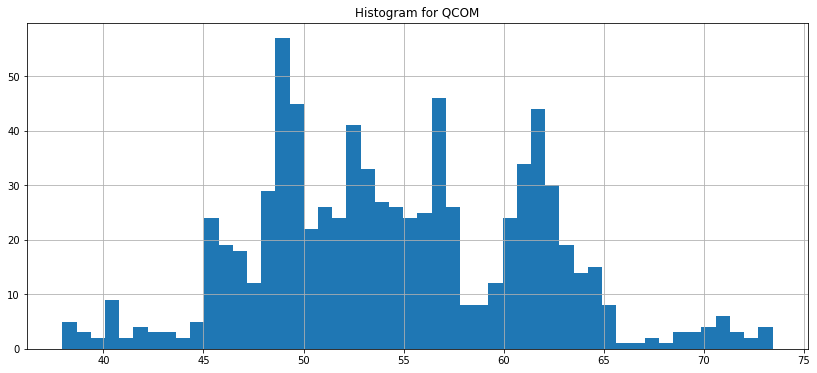

----

In [27]:
col_date = "date"
plotly_flag = False
eda.eda_cols_vs_datetime_col(data, col_date, plotly_flag)

# Plot Time Series with Outliers

## Column: GOOGL, dtype:float64

count: 808
nunique: 799
isnull sum: 0
zero count: 0
max: 1285.5 min: 681.14
percentage_of_outliers: 0.04702970297029703


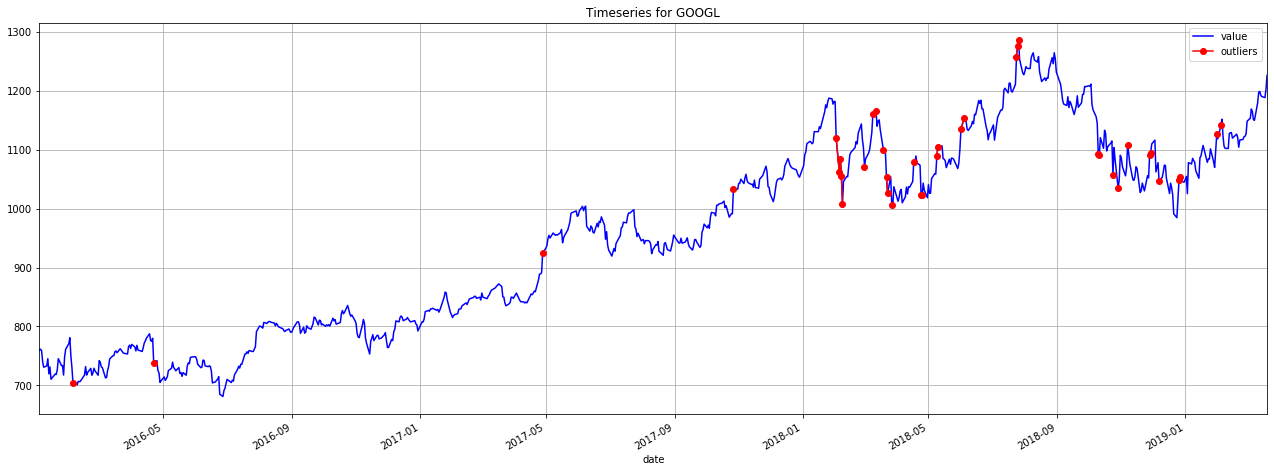

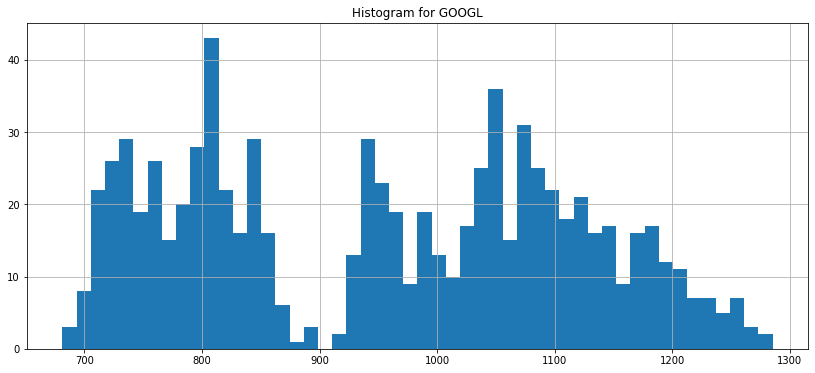

----

## Column: AMZN, dtype:float64

count: 808
nunique: 800
isnull sum: 0
zero count: 0
max: 2039.51 min: 482.07
percentage_of_outliers: 0.1051980198019802


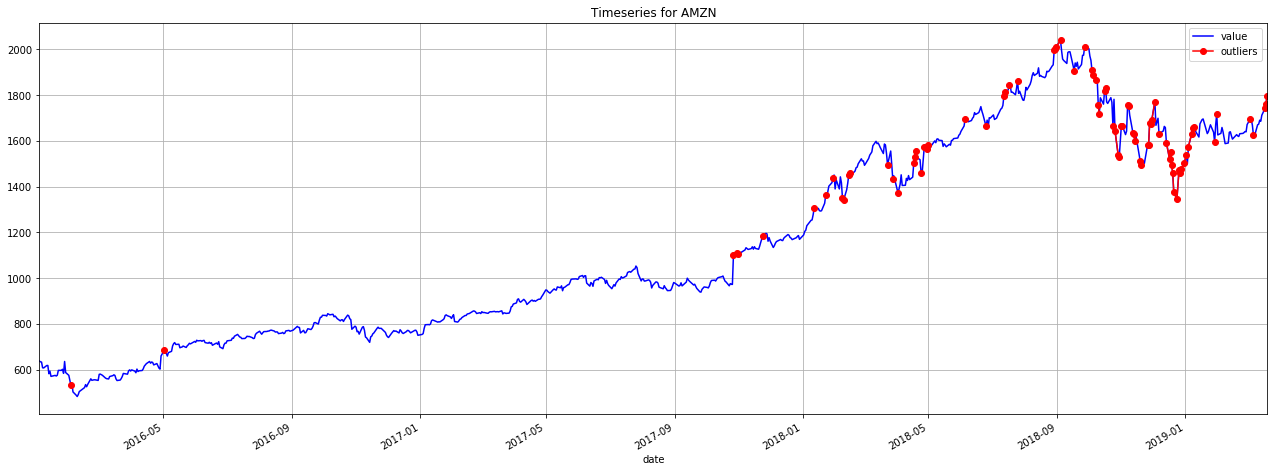

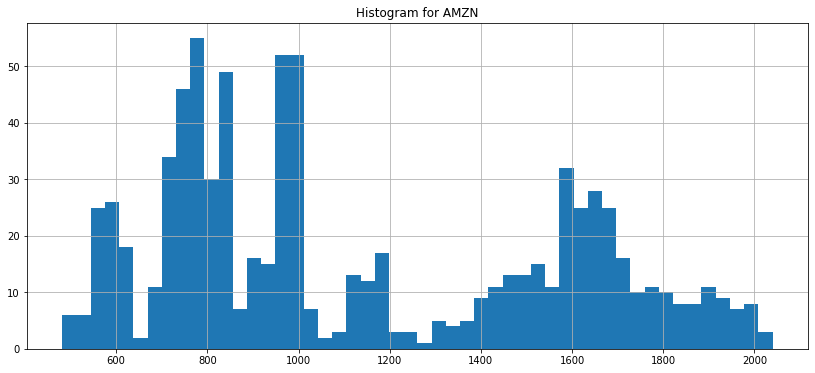

----

In [28]:
cols = ["date", "GOOGL", "AMZN"]
col_date = "date"
ma_window = 5
one_step_ahead_flag = False
show_limits_flag = False
sub_data = data[cols]
eda.eda_cols_vs_datetime_col_with_outliers(sub_data, col_date, ma_window, one_step_ahead_flag, show_limits_flag)

# Generate_column_correlation_network

## Communites:

['AAPL', 'AMZN', 'CSCO', 'GOOGL', 'HPQ', 'INTC', 'MSFT', 'NVDA', 'TSM', 'TXN']
-------------------
['DELL']
-------------------
['VMW']
-------------------


## Network:

number of nodes: 12
number of edges: 29


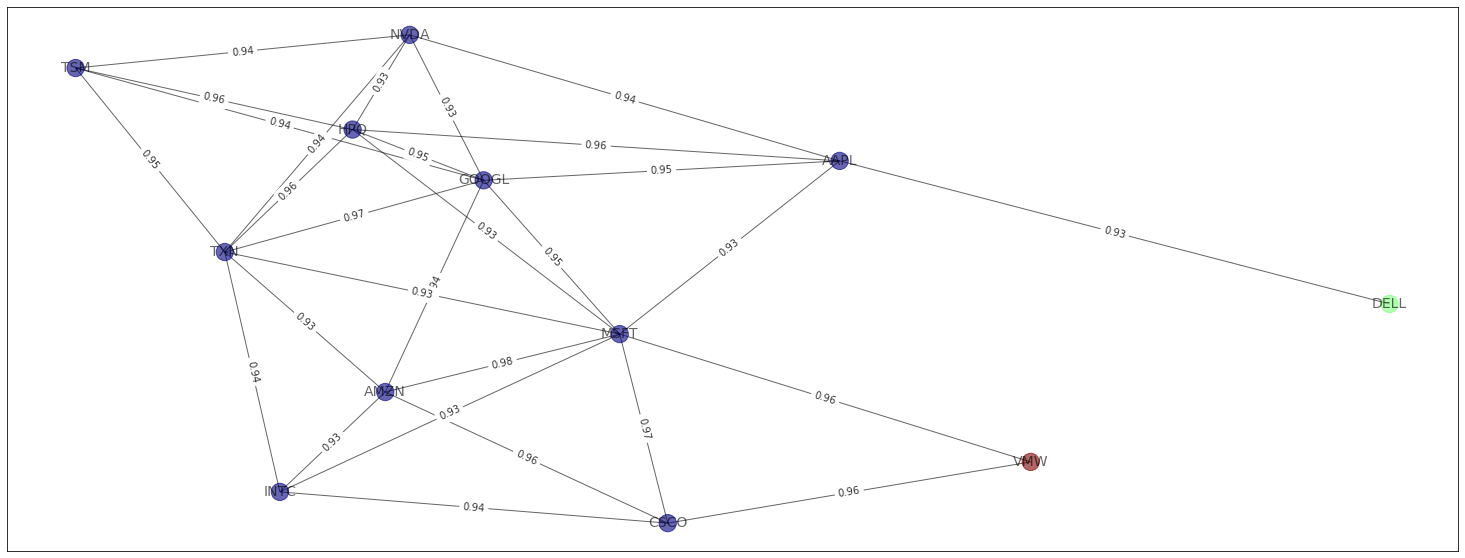

In [29]:
# Generate_column_correlation_network
corr_threshold = 0.93
edge_labels_flag=True
layout = 'spring_layout' #'circular_layout','spring_layout','planar_layout',
eda.generate_column_correlation_network(data, corr_threshold, edge_labels_flag, layout)

# Multiprocessing Example for some Dataframe work

In [44]:
# Given a dictionary of dataframes and action over dataframe retrun answer
subgroup_col = "neighbourhood_group"
subgroup_list = data[subgroup_col].unique()
dict_df = eda.get_dict_of_df_subgroups(data, subgroup_col)

In [47]:
def some_function_on_df(subgroup_df):
    res = subgroup_df["price"].median()
    return(res)

def some_function_on_df_with_tuple(tup):
    subgroup = tup[0]
    subgroup_df = tup[1]
    describe_list = list(subgroup_df["price"].describe().values)
    res = (subgroup, tuple(describe_list))
    return(res)

#new_df = eda.multiprocess_function_on_subgroup_df(subgroup_list, dict_df, some_function_on_df) 
new_df = eda.multiprocess_pool_function_on_subgroup_df(subgroup_list, dict_df, some_function_on_df_with_tuple)
new_df

,subgroup,subgroup_ans
0,Brooklyn,"(20104.0, 124.38320732192598, 186.87353781366258, 0.0, 60.0, 90.0, 150.0, 10000.0)"
1,Manhattan,"(21661.0, 196.8758136743456, 291.38318274158524, 0.0, 95.0, 150.0, 220.0, 10000.0)"
2,Queens,"(5666.0, 99.51764913519237, 167.1021550634422, 10.0, 50.0, 75.0, 110.0, 10000.0)"
3,Staten Island,"(373.0, 114.81233243967829, 277.6204033246219, 13.0, 50.0, 75.0, 110.0, 5000.0)"
4,Bronx,"(1091.0, 87.4967919340055, 106.70934861314632, 0.0, 45.0, 65.0, 99.0, 2500.0)"


# TODO
- split the time series eda to another notebook
- split the text eda to another notebook?